# 📊 **Interactive Data Analysis Report**

**Group Number:** 19

**Group Members:**
* **Chetan Dummegere Kumar** - 125111933
* **M Hasibul Ahsan** - 125125216
* **Nikith Sasikumar** - 125123481
* **Royston Raj** - 125180107
* **Surendra Pal** - 125118292
* **Yash Chandrakant Bharati** - 125107480

## **Project Overview**
This notebook documents a reproducible exploratory data analysis of Omni Customer Churn Synthetic Dataset. The primary goals are:

1. **Data Ingestion**  
   Loading all customer-related datasets into the Jupyter Notebook environment for inspection and processing.

2. **Data Cleaning**  
   Identifying and resolving data quality issues such as missing values, inconsistencies, incorrect data types, and outliers.

3. **Data Preparation**  
   Merging individual datasets into a unified DataFrame and creating derived fields.

4. **Data Analysis**  
    Perform statistical and visual EDA that reveals patterns, trends and potential anomalies and present findings and actionable insights.


#### **Methodology**

The approach follows a standard data-analytics lifecycle: *Get the data → Clean the data → Prepare the data → Analyze the data  → Visualize the data* (McCoy, 2020).



---


# Table of Contents

### 1. Data Ingestion
* 1.1 Data Loading
* 1.2 Description of Dataset Content



### 2. Data Cleaning and Pre-Processing
* 2.1 Cleaning the customer_info DataFrame
    * 2.1.1 Initial Inspection
    * 2.1.2 Issues Identified During the Data Examination Phase
    * 2.1.3 Simplify the Data
        * 2.1.3.1 Investigate and Handle Duplicate Records
        * 2.1.3.2 Investigate and Handle mismatch between number of actual unique values and unique values (As per documentation) for certain columns
        * 2.1.3.3 Rename column
    * 2.1.4 Find and Fix missing values
        * 2.1.4.1 Handle Numerical columns (`Age` , `TenureMonths`)
        * 2.1.4.2 Handle Categorical columns (`Region` , `Education`, `Paymentmethod`)
    * 2.1.5 Fix Data Type problems
        * 2.1.5.1 Conversion to datetime datatype
        * 2.1.5.2 Conversion to category datatype
        * 2.1.5.3 Conversion to float datatype
        * 2.1.5.4 Conversion to integer datatype
        * 2.1.5.5 Conversion to boolean datatype
    * 2.1.6 Data Validation: Find and Fix Invalid values
    * 2.1.7 Find and Fix outliers
* 2.2 Cleaning the customer_behavior DataFrame
    * 2.2.1 Initial Inspection
    * 2.2.2 Issues Identified During the Data Examination Phase
    * 2.2.3 Simplify the Data
        * 2.2.3.1 Investigate and Handle Duplicate Records
        * 2.2.3.2 Investigate and Handle mismatch between number of actual unique values (As per documentation) and unique values for certain columns
        * 2.2.3.3 Rename Column
    * 2.2.4 Find and Fix missing values
    * 2.2.5 Fix Data Type Problems
        * 2.2.5.1 Conversion to datetime datatype
        * 2.2.5.2 Conversion to category datatype
        * 2.2.5.3 Conversion to float datatype
    * 2.2.6 Data Validation: Find and Fix Invalid values
    * 2.2.7 Find and Fix outliers
* 2.3 Clean monthly_logins DataFrame
    * 2.3.1 Initial Inspection
    * 2.3.2 Issues Identified During the Data Examination Phase
    * 2.3.3 Simplify the Data
        * 2.3.3.1 Investigating and Handling Duplicate Records
        * 2.3.3.2 Find and Fix invalid values
    * 2.3.4 Find and Fix Outliers



### 3. Data Preparation
* 3.1 Merging Cleaned DataFrames
* 3.2 Creating Derived fields (Feature Engineering)
* 3.3 Segmentation



### 4. Data Analysis
* 4.1 Foundational Descriptive Statistics
    * 4.1.1 Age Distribution Profile
    * 4.1.2 Region and Education Distribution Profile
    * 4.1.3 Customer Profile Segmentation
    * 4.1.4 Revenue metrics
* 4.2 Foundational Churn Analysis: Baseline and Recency
* 4.3 Detailed Churn Analysis
    * 4.3.1 Structural and Financial Drivers
    * 4.3.2 Engagement Drivers
    * 4.3.3 Service Experience
* 4.4 Acquisition Seasonality Analysis



### 5. References



### 6. Appendix



### 7. Individual contribution statement


-----

### **Import Libraries**
The following libraries are imported to support the data analytics lifecycle:

* **Pandas (`pd`) & NumPy (`np`):** Used for data manipulation, structural inspection, and numerical operations.
* **Matplotlib (`plt`) & Seaborn (`sns`):** Used for generating data visualisations and statistical plots.

*Note: This notebook uses the following versions:*  

*1. Python: 3.10.19   
2. Pandas: 2.3.3  
3. Numpy: 2.2.5  
4. Matplotlib: 3.10.6  
5. Seaborn: 0.13.2*

In [ ]:
# Import the required libraries and assign them an alias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

___________

# 📥 **1. Data Ingestion**


## 1.1 Data Loading
Load the data from the csv files into three seperate DataFrames.


**Note on Data Sources**: The datasets were downloaded from the Canvas assignment page and are synthetic datasets prepared for the module. Each dataset's filename and brief schema description will be listed below after import. Any external sources used are referenced in the References section in APA format.

In [ ]:
# Try and Except block to display any errors that may be raised during data import
try:
    customer_info=pd.read_csv('/Users/chetan/Documents/Python/Basic Python/2025-IS6061_project_data/raw/customer_info.csv') # replace the path name with your file path
    #Importing the customer_behavior dataset and naming the DataFrame as "customer_info"

    customer_behavior=pd.read_csv("/Users/chetan/Documents/Python/Basic Python/2025-IS6061_project_data/raw/customer_behavior.csv") # replace the path name with your file path
    #Importing the customer_behavior dataset and naming the DataFrame as "customer_behavior"


    monthly_logins=pd.read_csv('/Users/chetan/Documents/Python/Basic Python/2025-IS6061_project_data/raw/monthly_logins.csv') # replace the path name with your file path
    # Importing the customer_behavior dataset and naming the DataFrame as "monthly_logins"


    print(" All three Datasets loaded successfully.")


except FileNotFoundError as e:
    print(f"Error loading data: {e}")

 All three Datasets loaded successfully.


## 1.2 Description of Dataset Content

To ensure accurate processing, we reference the official dataset documentation. The schema below outlines the expected data types, variable descriptions, and valid value ranges for the three ingested datasets.

<br>


1. **customer_info**:
*Contains demographic and contractual details.*
<br>
<br>


| Column Name               | Data Type | Description                                                                 | Possible Values  |
|---------------------------|-----------|-----------------------------------------------------------------------------|-------------------------------|
| CustomerID                | Integer   | Unique customer identifier                                                  | 1001, 1002, 1003, …          |
| Churn                     | Integer   | Customer churn status                                                      | 0 = Active, 1 = Churned       |
| Age                       | Float     | Customer age in years                                                      | 18.0 - 100.0                  |
| Gender                    | String    | Customer gender                                                            | Male, Female                  |
| Region                    | String    | Geographic region of customer                                              | North, South, East, West      |
| Education                 | String    | Highest education level completed                                          | High School, Diploma, Bachelor, Master, PhD |
| CustomerSegment           | String    | Internal classification of customer based on value, usage, or loyalty      | Bronze, Silver, Gold, Platinum |
| ContractLength            | String    | Contract term duration                                                     | Month-to-month, One year, Two year, 3-Year |
| ContractStartDate         | Date      | Date customer signed contract                                              | YYYY-MM-DD format             |
| PlanType                  | String    | Service plan tier                                                          | Basic, Standard, Premium, Ultra |
| TenureMonths              | Float     | Number of months as customer                                              | 0.0 - 120.0                   |
| MonthlyValue              | Float     | Monthly revenue from customer                                             | Contractual monthly charges   |
| PaymentMethod             | String    | Customer payment method                                                   | Credit Card, Bank Transfer, Electronic Check, PayPal |
| PaymentDelinquencyStatus  | String    | Payment delinquency category showing customer’s current billing status in relation to overdue payments. E.g., Current -> no overdue payments; 30+ -> payment overdue by 30-59 days | Current, 30+, 60+, 90+ |
| IncomeTier                | String    | Estimated income bracket                                                  | Low, Medium, High             |
| AutoPay                   | String    | Automatic payment enrolment                                               | Yes, No                       |

<br>
<br>



2. **customer_behavior**:
*Contains usage metrics, support interactions, and engagement scores.*

<br>



| Column Name               | Data Type | Description                                                                 | Possible Values / Valid Range |
|---------------------------|-----------|-----------------------------------------------------------------------------|-------------------------------|
| CustomerID                | Integer   | Unique customer identifier                                                  | 1001, 1002, 1003, …           |
| LoginsLastMonth           | Float     | Number of logins in most recent month                                       | 0.0 - 100.0+                  |
| LastLoginDate             | Date      | Date of most recent login                                                   | YYYY-MM-DD format              |
| RFMScore                  | Integer   | Composite engagement score based on Recency, Frequency, and Monetary value  | 1 - 20                         |
| UsageChangePct            | Float     | Percentage change in usage from prior period                               | -1.0 to 1.0 (percentage as decimal) |
| CompetitorIndex           | Float     | Market competition intensity in customer area (higher = more competitors)  | 0.0 - 1.0                     |
| TicketsOpened             | Integer   | Number of support tickets submitted                                        | 0 - 50+                        |
| TicketsResolutionTime     | Float     | Average hours to resolve support tickets                                    | 0.0 - 100.0+                  |
| ComplaintCategory         | String    | Primary complaint type                                                     | Technical, Billing, Service, Account |
| FamilyPlan                | String    | Family/multi-user plan enrolment                                           | Yes, No                        |
| AddOnBundle               | String    | Additional service subscriptions                                           | Movies, Sports, Music, Security, Gaming, Kids, None |
| SupportChannelPreferred   | String    | Preferred support contact method                                           | Phone, Email, Chat, App        |
| MonthlyValue              | Float     | Monthly cost to service customer                                           | Operational servicing expenses |


<br>
<br>


3. **monthly_logins**: *Contains time-series login data pivoted by month.*

<br>

| Column Name  | Data Type    | Description                     | Possible Values                  |
|--------------|-------------|---------------------------------|---------------------------------|
| CustomerID   | Integer     | Unique customer identifier       | 1001, 1002, 1003, …            |
| Month_YYYY   | Float/Null  | Login count for Month YYYY       | 0 - 200, or null if customer did not exist |




**Quick Schema Overview:** View the data in each DataFrame

In [ ]:
# View top 5 rows in customer_info dataframe
customer_info.head()

,CustomerID,Churn,Age,Gender,Region,Education,CustomerSegment,ContractLength,ContractStartDate,PlanType,TenureMonths,MonthlyValue,PaymentMethod,PaymentDelinquencyStatus,IncomeTier,AutoPay
0,1148,0,49.0,Male,East,PhD,Bronze,Month-to-month,2024-12-16,Ultra,28.000000,161.59,NaN,Current,Low,Yes
1,4097,1,72.0,Male,North,Diploma,Silver,Month-to-month,2025-06-24,Premium,9.000000,117.18,Electronic Check,30+,High,Yes
2,8238,0,50.0,Male,East,High School,Silver,3-Year,2025-08-08,Basic,5.000000,30.17,Crypto,30+,Low,Yes
3,32449,1,67.0,Male,North,Diploma,Platinum,Month to month,2023-10-12,Basic,69.000000,198.49,Bank Transfer,30+,Very High,Yes
4,37330,0,27.0,Female,West,Bachelors,Bronze,2-year,2016-08-07,Ultra,320.725674,105.165,Bank Transfer,Current,High,Yes


In [ ]:
# View top 5 rows in customer_behavior dataframe
customer_behavior.head()

,CustomerID,LoginsLastMonth,LastLoginDate,RFMScore,UsageChangePct,CompetitorIndex,TicketsOpened,TicketsResolutionTime,ComplaintCategory,FamilyPlan,AddOnBundle,SupportChannelPreferred,MonthlyValue
0,1148,27.0,2025-09-22,3.0,0.395954,0.596940,6,63.614052,Technical,Yes,Movies,Email,805.18 EUR
1,4097,67.0,2025-06-25,13.0,-0.759669,0.592672,12,26.747717,Technical,Yes,Sports,Chat,678.69
2,8238,21.0,2025-09-16,10.0,-0.815715,0.109671,18,10.310044,Technical,Yes,Movies,App,396.63 EUR
3,32449,67.0,2025-06-23,6.0,0.729624,0.946786,8,42.187965,Technical,Yes,Kids,Chat,713.13
4,37330,31.0,2025-09-20,1.0,0.424352,0.500805,3,49.035128,Retention,No,Movies,Phone,316.47


In [ ]:
# View top 5 rows in monthly_logins dataframe
monthly_logins.head()

,CustomerID,nov_2023,Dec-2023,Jan_2024,feb_2024,Mar-2024,Apr_2024,may_2024,Jun-2024,Jul_2024,aug_2024,Sep-2024,Oct_2024,nov_2024,Dec-2024,Jan_2025,feb_2025,Mar-2025,Apr_2025,may_2025,Jun-2025,Jul_2025,aug_2025,Sep-2025,Oct_2025
0,1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,39.0,38.0,31.0,30.0,39.0,0.0,35.0,35.0,42.0
1,4097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,72.0,52.0,37.0
2,8238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,12.0
3,32449,179.0,164.0,179.0,146.0,132.0,132.0,97.0,114.0,103.0,81.0,112.0,104.0,88.0,75.0,68.0,69.0,84.0,0.0,76.0,57.0,59.0,47.0,42.0,45.0
4,37330,25.0,25.0,0.0,27.0,33.0,0.0,32.0,26.0,36.0,39.0,31.0,40.0,30.0,35.0,33.0,41.0,40.0,0.0,46.0,43.0,42.0,42.0,49.0,36.0


_____________

# 🧹2. **Data Cleaning and Pre-Processing**

Before merging the datasets, each DataFrame is examined and cleaned individually. This step ensures that issues such as missing values, inconsistent formats, incorrect data types, duplicates, and potential outliers are addressed early. Cleaning the datasets separately supports smoother merging, improves schema alignment, and strengthens the overall quality of the final combined dataset.

Sections 2.1, 2.2, and 2.3 document the cleaning steps taken for each dataframe/ table.

## 2.1 Cleaning the customer_info DataFrame

### 2.1.1 Initial Inspection

The customer_info DataFrame was examined using the `.info()` method. Following parameters were used:
1. verbose=True: Ensures that information for all columns is displayed, which is useful for wide datasets.
2. memory_usage='deep': Provides a more accurate estimate of memory consumption.
3. show_counts=True: Displays non-null counts for each column, allowing quick identification of missing data patterns.

This initial inspection helps identify potential data quality issues, such as incorrect data types, missing values before applying cleaning operations.


In [ ]:
# use .info() method to inspect the dataframe
customer_info.info(verbose=True,memory_usage='deep',show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10060 entries, 0 to 10059
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                10060 non-null  object 
 1   Churn                     10060 non-null  int64  
 2   Age                       9859 non-null   float64
 3   Gender                    10060 non-null  object 
 4   Region                    9897 non-null   object 
 5   Education                 9961 non-null   object 
 6   CustomerSegment           10060 non-null  object 
 7   ContractLength            10060 non-null  object 
 8   ContractStartDate         10060 non-null  object 
 9   PlanType                  10060 non-null  object 
 10  TenureMonths              9880 non-null   float64
 11  MonthlyValue              10060 non-null  object 
 12  PaymentMethod             9437 non-null   object 
 13  PaymentDelinquencyStatus  10060 non-null  object 
 14  Income

To understand the variability of each field in the customer_info DataFrame, we computed the number of unique values per column using the `.nunique()`method. This provides a quick assessment of categorical richness.

In [ ]:
# Use .nunique() method
customer_info.nunique()

CustomerID                  10003
Churn                           2
Age                           122
Gender                         28
Region                         43
Education                      43
CustomerSegment                30
ContractLength                 20
ContractStartDate            1302
PlanType                       16
TenureMonths                  223
MonthlyValue                 7585
PaymentMethod                  21
PaymentDelinquencyStatus        5
IncomeTier                     24
AutoPay                        14
dtype: int64

###  ⚠️  2.1.2 Issues Identified During the Data Examination Phase

A detailed review of the customer_info DataFrame revealed several quality concerns that require further cleaning and validation.

1. **CustomerID Uniqueness Concern**: Although CustomerID should serve as a unique identifier, the dataset contains only 10,003 unique values, which is fewer than the total number of records (10,060). This discrepancy indicates potential duplication or data-entry inconsistencies and requires further investigation before merging.

2. **Mismatch Between Documented and Observed Unique Values**: Based on the dataset documentation, several categorical fields should contain a limited number of discrete values. However, the DataFrame shows far higher cardinality in many of these columns, suggesting issues such as inconsistent labelling, hidden whitespace, casing differences, or data corruption.    

</br>


| Column   | Unique values (As per documentation) | Unique values in the DataFrame |
|----------|----------|----------|
|  Gender | 2    | 28    |
|  Region  | 4   | 43    |
|  Education  | 5    | 43    |
|    CustomerSegment| 4    | 30    |
|   ContractLength | 4    |   20  |
| PlanType | 4 | 16 |
| PaymentMethod | 4  | 21 |  
| PaymentDelinquencyStatus | 4 | 5
| IncomeTier | 3 | 24 |
|  AutoPay | 2 |14 |



These discrepancies require targeted cleaning, including standardization of string values, trimming whitespace, and mapping inconsistent values to their correct categories.


</br>


3. **Columns with Missing Values**: Columns with non-null counts lower than the total dataset size (10,060 rows) indicate missing data. The following fields contain missing values and must be addressed using appropriate imputation or categorical encoding strategies:

- PaymentMethod ( ~6.2% missing values)
- Age (~ 2% missing values)
- TenureMonths ( ~ 1.79% misisng values)
- Region (~ 1.62% missing values)
- Education (~ 0.98% missing values)




4. **Data Type Optimization**: The following columns only have a few distinct values (As per the Documentation) and hence can be converted into category datatype for efficient memory management:
 - Gender
 - Region
 - Education
 - CustomerSegment
 - Contractlength
 - PlanType
 - PaymentMethod
 - PaymentDelinquencyStatus
 - IncomeTier
 - AutoPay



### 2.1.3 Simplify the Data

#### 2.1.3.1 Investigate and Handle Duplicate Records

We will investigate why there are 10,060 rows but only 10,003 distinct **CustomerID** : Are there duplicate rows?    

Lets find the duplicate rows in the dataframe

In [ ]:
# number of duplicated rows in the DataFrame
len(customer_info[customer_info.duplicated()])

54

**Drop the duplicate rows** : To maintain the unique customer profile and adhere to the principle of a single primary key per customer, we must remove these redundant rows.

In [ ]:
# Drop duplicate rows based on all columns, keeping the first occurence intact by setting parameter keep='first'
customer_info.drop_duplicates(keep='first',inplace=True)

Check if number of rows are now equal to number of unique customer IDs

In [ ]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10006 entries, 0 to 10051
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                10006 non-null  object 
 1   Churn                     10006 non-null  int64  
 2   Age                       9806 non-null   float64
 3   Gender                    10006 non-null  object 
 4   Region                    9843 non-null   object 
 5   Education                 9907 non-null   object 
 6   CustomerSegment           10006 non-null  object 
 7   ContractLength            10006 non-null  object 
 8   ContractStartDate         10006 non-null  object 
 9   PlanType                  10006 non-null  object 
 10  TenureMonths              9826 non-null   float64
 11  MonthlyValue              10006 non-null  object 
 12  PaymentMethod             9389 non-null   object 
 13  PaymentDelinquencyStatus  10006 non-null  object 
 14  IncomeTier 

Even after deleting the duplicated rows, there are 10,006 rows for CustomerID, but they are 3 more than the unique values.
  
This means although the entire row has not been duplicated, only the CustomerID is duplicated. These CustomerIDs need to be investigated, since we will be joining different dataframes based on ColumnID, they have to be unique.

In [ ]:
# Check for duplicated rows
customer_info[customer_info['CustomerID'].duplicated()]

,CustomerID,Churn,Age,Gender,Region,Education,CustomerSegment,ContractLength,ContractStartDate,PlanType,TenureMonths,MonthlyValue,PaymentMethod,PaymentDelinquencyStatus,IncomeTier,AutoPay
10004,4432,0,18.0,Male,North,PhD,Gold,3-Year,2024-05-31,Premium,47.0,65.23,Credit Card,Current,High,Yes
10007,36803,0,76.0,Male,South,Bachelors,Gold,Two year,2023-07-10,Basic,78.0,178.18,Crypto,Current,High,No
10051,42773,1,50.0,Male,West,Diploma,Silver,3 year,2023-11-08,Standard,66.0,37.27,cash,Current,Low,Yes


**Investigation Rationale:**  


 While the simplest approach is to immediately drop duplicates and keep the first occurrence, the project methodology prioritizes **data integrity**. By manually inspecting the conflicting rows (as identified in the previous code block), we ensure that the non-unique rows were effectively redundant. In the absence of complex discrepancies, the policy is to **retain the first instance** of the CustomerID to enforce the primary key constraint.

In [ ]:
# Display rows with CustomerID==4432
customer_info[customer_info['CustomerID']=='4432']

,CustomerID,Churn,Age,Gender,Region,Education,CustomerSegment,ContractLength,ContractStartDate,PlanType,TenureMonths,MonthlyValue,PaymentMethod,PaymentDelinquencyStatus,IncomeTier,AutoPay
9998,4432,0,18.0,Male,North,PhD,Gold,3-Year,2024-05-31,Premium,47.0,65.23,Credit Card,Current,High,Yes
10004,4432,0,18.0,Male,North,PhD,Gold,3-Year,2024-05-31,Premium,47.0,65.23,Credit Card,Current,High,Yes


These two rows have exact same data. So we can drop one of these rows. We will drop it using the `.drop(index)` method

In [ ]:
# drop the row in index 10004 , thus keeping the first instance
customer_info=customer_info.drop(index=10004)

Repeat the process for the other two CustomerID's as well

In [ ]:
# Display rows with CustomerID==36083
customer_info[customer_info['CustomerID']=='36803']

,CustomerID,Churn,Age,Gender,Region,Education,CustomerSegment,ContractLength,ContractStartDate,PlanType,TenureMonths,MonthlyValue,PaymentMethod,PaymentDelinquencyStatus,IncomeTier,AutoPay
4459,36803,0,200.0,Male,South,Bachelors,Gold,Two year,2023-07-10,Basic,78.0,178.18,Crypto,Current,High,No
10007,36803,0,76.0,Male,South,Bachelors,Gold,Two year,2023-07-10,Basic,78.0,178.18,Crypto,Current,High,No


In [ ]:
# drop the row in index 10007 , thus keeping the first instance
customer_info=customer_info.drop(index=10007)

In [ ]:
# Display rows with CustomerID==42773
customer_info[customer_info['CustomerID']=='42773']

,CustomerID,Churn,Age,Gender,Region,Education,CustomerSegment,ContractLength,ContractStartDate,PlanType,TenureMonths,MonthlyValue,PaymentMethod,PaymentDelinquencyStatus,IncomeTier,AutoPay
1559,42773,1,50.0,Male,West,Diploma,Silver,3 year,2023-11-08,Standard,66.0,37.27,cash,Current,Low,Yes
10051,42773,1,50.0,Male,West,Diploma,Silver,3 year,2023-11-08,Standard,66.0,37.27,cash,Current,Low,Yes


In [ ]:
# drop the row in index 10051 , thus keeping the first instance
customer_info=customer_info.drop(index=10051)

In [ ]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10003 entries, 0 to 10019
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                10003 non-null  object 
 1   Churn                     10003 non-null  int64  
 2   Age                       9803 non-null   float64
 3   Gender                    10003 non-null  object 
 4   Region                    9840 non-null   object 
 5   Education                 9904 non-null   object 
 6   CustomerSegment           10003 non-null  object 
 7   ContractLength            10003 non-null  object 
 8   ContractStartDate         10003 non-null  object 
 9   PlanType                  10003 non-null  object 
 10  TenureMonths              9823 non-null   float64
 11  MonthlyValue              10003 non-null  object 
 12  PaymentMethod             9386 non-null   object 
 13  PaymentDelinquencyStatus  10003 non-null  object 
 14  IncomeTier 

Now, the number of rows are equal to number of unique CustomerIDs

#### 2.1.3.2  Investigate and handle mismatch between number of actual unique values and unique values (As per documentation) for certain columns

**Rationale for Custom Mapping:** While automated string cleaning is the first step, a rigorous investigation revealed instances where alternative abbreviations (e.g., "HS" for "High School" or "m" for "Male") are used. So, stripping the whitespaces and handling inconsistent casing wont be sufficient. Instead, we will perform **Custom Value Mapping** after initial inspection to consolidate all synonymous values into the single, correct categorical value defined in the documentation. This ensures maximum consistency.

We will define specific dictionaries for each inconsistent column (**Gender**,**Region**, **Education**, etc.) and apply the mapping using the `.replace()` method.


1. Gender Column

Find the number of unique values in Gender column

In [ ]:
# Unique values in the Gender column
customer_info['Gender'].unique()

array(['Male', 'Female', 'Female ', 'F', 'MALE', 'female', 'M', ' Female',
       'FEMALE', 'male', ' Male', 'Male ', ' MALE', ' Female ', 'Male  ',
       ' Male ', '  Male', 'Female  ', ' Male  ', '  Female', 'F  ',
       ' FEMALE ', 'M ', ' F', ' M ', ' MALE ', '   Male', ' FEMALE'],
      dtype=object)

Since, we can intrepret that there are actually only two values for gender: Male and Female. We can replace the similar values with either 'Male' or 'Female'.  
  
    

| Values to be Replaced  | Value to be used |
|----------|----------|
| 'Male', 'MALE', 'M' , 'male' , ' Male' , 'Male ', ' MALE', 'Male  ' , ' Male ' , '  Male' , ' Male  ' , 'M ' , ' M ' , ' MALE ' , '   Male'   | 'Male'    |
|  'Female', 'Female ' , 'F' , 'female' , ' Female' , 'FEMALE' , ' Female ' ,  'Female  ' , '  Female' , 'F  ' , ' FEMALE ' , ' F' , ' FEMALE'  | 'Female'   |



In [ ]:
# create a dictionary with the mapping between the values to be replaced and the value with which it will be replaced
gender_dict= {'Male': 'Male','male': 'Male','MALE': 'Male',' Male': 'Male','Male ': 'Male',' MALE': 'Male',' MALE ': 'Male','  Male': 'Male','   Male': 'Male','M': 'Male','M ': 'Male',' M': 'Male',' M ': 'Male','Male  ':'Male', ' Male ':'Male', ' Male  ':'Male','Female': 'Female','female': 'Female','FEMALE': 'Female',' Female': 'Female','Female ': 'Female',' Female ': 'Female','  Female': 'Female','Female  ': 'Female',' FEMALE ': 'Female',' FEMALE': 'Female','F': 'Female','F ': 'Female',' F': 'Female','F  ': 'Female'}
# replace the values
customer_info['Gender']=customer_info['Gender'].replace(gender_dict)

# Check the unique values in the gender column post-replacement
customer_info['Gender'].unique()

array(['Male', 'Female'], dtype=object)

2. Region column


In [ ]:
# Unique values in the Region column
customer_info['Region'].unique()

array(['East', 'North', 'North ', 'West', 'South', 'east', 'East ',
       'Central', 'west', 'WEST', ' East', 'West ', 'south', 'north',
       'South ', 'SOUTH', ' South', nan, 'North  ', 'EAST', 'South  ',
       'West  ', 'East  ', 'NORTH', '  South', ' North', ' West ',
       ' Central', ' South ', ' West', ' North ', '  West', '  Central',
       ' west', ' Central ', '  North', ' East ', '  north', 'Central  ',
       ' South  ', '  SOUTH', '  East', ' east', 'Central '], dtype=object)

In [ ]:
# Number of rows/records with region as Central
customer_info[customer_info['Region'].isin(['Central' ,' Central',' Central ',  'Central  ', 'Central ','  Central' , 'Central'])].shape[0]



1964

We maintain a rigorous standardization approach. However, due to the high volume of records (~ 19%) associated with the 'Central' region, **we cannot simply drop or map these records to one of the four documented regions**. The decision is to **Retain the 'Central' category** as a valid geographic entity in the dataset.

This strategy ensures that valuable data is not discarded.

Since, we can intrepret that there are actually only five values for Region: East, West, North, South and Central. We can replace the similar values with either of these 5 values  
  
    

| Values to be Replaced  | Value to be used |
|----------|----------|
| 'East', 'east', 'East ','EAST','East  ',' East ','  East', ' east',' East' | 'East' |
| 'North', 'North ','north','North  ','NORTH',' North',' North ','  North',  '  north', | 'North' |
| 'West', 'West  ','west', 'WEST','West ',' West ',' West',  '  West',' west'| 'West'
|  'South','South ', 'SOUTH', ' South',   'south',   'South  ','  South',' South ',' South  ', '  SOUTH'| 'South' |
| 'Central' ,' Central',' Central ',  'Central  ', 'Central ','  Central' | 'Central' |



In [ ]:
# create a dictionary with the mapping between the values to be replaced and the value with which it will be replaced
region_dict={
    # East
    'East': 'East', 'east': 'East', 'East ': 'East', 'EAST': 'East',
    'East  ': 'East', ' East ': 'East', '  East': 'East', ' east': 'East', ' East': 'East',

    #North
    'North': 'North', 'North ': 'North', 'north': 'North', 'North  ': 'North',
    'NORTH': 'North', ' North': 'North', ' North ': 'North',
    '  North': 'North', '  north': 'North',

    # West
    'West': 'West', 'West  ': 'West', 'west': 'West', 'WEST': 'West',
    'West ': 'West', ' West ': 'West', ' West': 'West', '  West': 'West', ' west': 'West',

    # South
    'South': 'South', 'South ': 'South', 'SOUTH': 'South', ' South': 'South',
    'south': 'South', 'South  ': 'South', '  South': 'South', ' South ': 'South',
    ' South  ': 'South', '  SOUTH': 'South',

    # Central
    'Central': 'Central', ' Central': 'Central', ' Central ': 'Central',
    'Central  ': 'Central', 'Central ': 'Central', '  Central': 'Central',
}

# replace the values
customer_info['Region']=customer_info['Region'].replace(region_dict)


# Check the unique values in Region column post-replacement
customer_info['Region'].unique()

array(['East', 'North', 'West', 'South', 'Central', nan], dtype=object)

Note: nan values will be handled later

3. Education column

In [ ]:
# Unique values in the Education column
customer_info['Education'].unique()

array(['PhD', 'Diploma', 'High School', 'Bachelors', 'High-School',
       'Masters', 'DIPLOMA', 'diploma', 'Ph.D.', nan, 'Diploma  ', 'Dip',
       'Diploma ', 'HS', 'High School  ', 'phd', ' Bachelors', ' PhD ',
       'Bachelors ', '  Masters', ' Diploma', '  PhD', ' High School ',
       ' Diploma ', 'Bachelors  ', ' Bachelors ', '  Diploma',
       'Masters  ', 'Masters ', 'DIPLOMA ', '  Bachelors', 'PhD ', ' PhD',
       '  High School', ' DIPLOMA ', 'PhD  ', 'High School ',
       ' High School', ' High-School', ' Masters', ' Masters ', 'Dip ',
       'diploma ', ' HS'], dtype=object)

Since, we can intrepret that there are actually only five values for Education: High School, Diploma, Bachelor, Master, PhD.  
We can replace the similar values with either of these 5 values  
  
    

| Values to be Replaced  | Value to be used |
|----------|----------|
| 'High School  ', 'High School ', ' High School ',' High School', '  High School', 'High-School', ' High-School','HS', ' HS'|'High School'  |
| 'DIPLOMA', 'diploma', 'Diploma  ', 'Diploma ',  ' Diploma',' Diploma ', '  Diploma',  'DIPLOMA ' ' DIPLOMA ': 'Diploma', 'Dip': 'Diploma', 'Dip ': 'Diploma','diploma '| 'Diploma' |
|  'Bachelors', ' Bachelors', 'Bachelors ', ' Bachelors ', 'Bachelors  ', '  Bachelors'|'Bachelor'|
|  'Masters ', 'Masters  ',' Masters',  ' Masters ', '  Masters'|'Master' |
|  'PhD ','PhD  ',' PhD ', 'Ph.D.', 'phd', ' PhD', '  PhD'|'Phd'|

In [ ]:
# create a dictionary with the mapping between the values to be replaced and the value with which it will be replaced
education_dict={
    # High School
    'High School': 'High School', 'High School  ': 'High School',
    'High School ': 'High School', ' High School ': 'High School',
    ' High School': 'High School', '  High School': 'High School',
    'High-School': 'High School', ' High-School': 'High School',
    'HS': 'High School', ' HS': 'High School',

    # Diploma
    'Diploma': 'Diploma', 'DIPLOMA': 'Diploma', 'diploma': 'Diploma',
    'Diploma  ': 'Diploma', 'Diploma ': 'Diploma', ' Diploma': 'Diploma',
    ' Diploma ': 'Diploma', '  Diploma': 'Diploma', 'DIPLOMA ': 'Diploma',
    ' DIPLOMA ': 'Diploma', 'Dip': 'Diploma', 'Dip ': 'Diploma',
    'diploma ': 'Diploma',

    # Bachelor
    'Bachelors': 'Bachelor', ' Bachelors': 'Bachelor',
    'Bachelors ': 'Bachelor', ' Bachelors ': 'Bachelor',
    'Bachelors  ': 'Bachelor', '  Bachelors': 'Bachelor',

    # Master
    'Masters': 'Master', 'Masters ': 'Master', 'Masters  ': 'Master',
    ' Masters': 'Master', ' Masters ': 'Master', '  Masters': 'Master',

    # PhD
    'PhD': 'PhD', 'PhD ': 'PhD', 'PhD  ': 'PhD', ' PhD ': 'PhD',
    'Ph.D.': 'PhD', 'phd': 'PhD', ' PhD': 'PhD', '  PhD': 'PhD'
}

# replace the values
customer_info['Education']=customer_info['Education'].replace(education_dict)

# Check the unique values in Education column post-replacement
customer_info['Education'].unique()


array(['PhD', 'Diploma', 'High School', 'Bachelor', 'Master', nan],
      dtype=object)

4. CustomerSegment column


In [ ]:
# Unique values in the CustomerSegment column
customer_info['CustomerSegment'].unique()

array(['Bronze', 'Silver', 'Platinum', 'Diamond', 'Gold', ' Platinum',
       'Silver  ', 'Diamond ', 'Bronze  ', ' Silver ', ' Platinum ',
       ' Bronze ', '  Silver', 'Bronze ', '  Bronze', ' Gold',
       ' Diamond ', ' Bronze', ' Silver', 'Gold  ', 'Silver ',
       'Platinum  ', ' Gold ', '  Gold', 'Gold ', ' Diamond',
       '  Platinum', 'Platinum ', 'Diamond  ', '  Diamond'], dtype=object)

In [ ]:
# Number of records/rows with CustomerSegment as Diamond
customer_info[customer_info['CustomerSegment'].isin(['Diamond','Diamond', 'Diamond ', ' Diamond ', ' Diamond', 'Diamond  ', '  Diamond','Diamond' ])].shape[0]

520

Due to the high volume of records (5.19 %) associated with the 'Diamond' CustomerSegment, **we cannot simply drop or map these records to one of the four documented CustomerSegment**. The decision is to **Retain the 'Diamond' category**.

This strategy ensures that valuable data is not discarded.

Since, we can intrepret that there are actually only five values for CustomerSegment: Bronze, Silver, Gold, Platinum and Diamond. We can replace the similar values with either of these 5 values:


| Values to be Replaced | Value to be used |
|-----------------------|------------------|
| 'Bronze', 'Bronze  ', ' Bronze ', 'Bronze ', '  Bronze', ' Bronze' | 'Bronze' |
| 'Silver', 'Silver  ', ' Silver ', 'Silver ', '  Silver' | 'Silver' |
| 'Gold', ' Gold', 'Gold  ', ' Gold ', '  Gold', 'Gold ' | 'Gold' |
| 'Platinum', ' Platinum', 'Platinum  ', ' Platinum ', '  Platinum', 'Platinum ' | 'Platinum' |
| 'Diamond': 'Diamond', 'Diamond ', ' Diamond ', ' Diamond', 'Diamond  ', '  Diamond' | 'Diamond' |

In [ ]:
# create a dictionary with the mapping between the values to be replaced and the value with which it will be replaced

CustomerSegment_dict={
    # Bronze
    'Bronze': 'Bronze', 'Bronze  ': 'Bronze', ' Bronze ': 'Bronze',
    'Bronze ': 'Bronze', '  Bronze': 'Bronze', ' Bronze': 'Bronze',

    # Silver
    'Silver': 'Silver', 'Silver  ': 'Silver', ' Silver ': 'Silver',
    'Silver ': 'Silver', '  Silver': 'Silver'," Silver":'Silver',

    # Gold
    'Gold': 'Gold', ' Gold': 'Gold', 'Gold  ': 'Gold',
    ' Gold ': 'Gold', '  Gold': 'Gold', 'Gold ': 'Gold',

    # Platinum
    'Platinum': 'Platinum', ' Platinum': 'Platinum',
    'Platinum  ': 'Platinum', ' Platinum ': 'Platinum',
    '  Platinum': 'Platinum', 'Platinum ': 'Platinum',

    # Diamond
    'Diamond': 'Diamond', 'Diamond ': 'Diamond',
    ' Diamond ': 'Diamond', ' Diamond': 'Diamond',
    'Diamond  ': 'Diamond', '  Diamond': 'Diamond'
}

# replace the values
customer_info['CustomerSegment']=customer_info['CustomerSegment'].replace(CustomerSegment_dict)

# Check the unique values in CustomerSegment column post-replacement
customer_info['CustomerSegment'].unique()


array(['Bronze', 'Silver', 'Platinum', 'Diamond', 'Gold'], dtype=object)

5. Contractlength column


In [ ]:
# Unique values in the Contractlength column
customer_info['ContractLength'].unique()

array(['Month-to-month', '3-Year', 'Month to month', '2-year', 'One year',
       'Two year', 'MTM', '3-year', '2 year', '24 months', 'Monthly',
       'M2M', 'two year', 'month-to-month', 'one year', '3 year',
       '1 year', '36 months', '1-year', '12 months'], dtype=object)

Since, we can intrepret that there are actually only four values for ContractLength: Month-to-month, One year, Two year and Three year. We can replace the similar values with either of these 4 values:

| Values to be Replaced | Value to be used |
|----------------------|-----------------|
| 'Month-to-month', 'Month to month', 'month-to-month', 'MTM', 'Monthly', 'M2M', 'month to month' | 'Month-to-month' |
| 'One year', 'one year', '1 year', '1-year', '12 months' | 'One year' |
| 'Two year', 'two year', '2 year', '2-year', '24 months' | 'Two year' |
| '3-Year', '3-year', '3 year', '36 months' | 'Three Year' |

In [ ]:
# create a dictionary with the mapping between the values to be replaced and the value with which it will be replaced
ContractLength_dict={
    # Month-to-month
    'Month-to-month': 'Month-to-month', 'Month to month': 'Month-to-month',
    'month-to-month': 'Month-to-month', 'MTM': 'Month-to-month',
    'Monthly': 'Month-to-month', 'M2M': 'Month-to-month',

    # One year
    'One year': 'One year', 'one year': 'One year',
    '1 year': 'One year', '1-year': 'One year', '12 months': 'One year',

    # Two year
    'Two year': 'Two year', 'two year': 'Two year',
    '2 year': 'Two year', '2-year': 'Two year', '24 months': 'Two year',

    # 3-Year
    '3-Year': 'Three Year', '3-year': 'Three Year', '3 year': 'Three Year', '36 months': 'Three Year'
}


# replace the values
customer_info['ContractLength']=customer_info['ContractLength'].replace(ContractLength_dict)


# Check the unique values  post-replacement
customer_info['ContractLength'].unique()

array(['Month-to-month', 'Three Year', 'Two year', 'One year'],
      dtype=object)

6. PlanType column


In [ ]:
# Unique values in the PlanType column
customer_info['PlanType'].unique()

array(['Ultra', 'Premium', 'Basic', 'BASIC', 'STANDARD', 'Ultra Plan',
       'Standard', 'basic', 'ultra', 'standard', 'Prem', 'premium',
       'Basic Plan', 'ULTRA', 'PREMIUM', 'Std'], dtype=object)

Since, we can intrepret that there are actually only four values PlanType: Basic, Standard, Premium and Ultra. We can replace the similar values with either of these 4 values:

| Values to be Replaced | Value to be used |
|----------------------|-----------------|
| 'Basic', 'BASIC', 'basic', 'Basic Plan' | 'Basic' |
| 'Standard', 'STANDARD', 'standard', 'Std' | 'Standard' |
| 'Premium', 'premium', 'PREMIUM', 'Prem' | 'Premium' |
| 'Ultra', 'Ultra Plan', 'ultra', 'ULTRA' | 'Ultra' |

In [ ]:
# create a dictionary with the mapping between the values to be replaced and the value with which it will be replaced
PlanType_dict={# Basic
    'Basic': 'Basic', 'BASIC': 'Basic', 'basic': 'Basic', 'Basic Plan': 'Basic',

    # Standard
    'Standard': 'Standard', 'STANDARD': 'Standard', 'standard': 'Standard', 'Std': 'Standard',

    # Premium
    'Premium': 'Premium', 'premium': 'Premium', 'PREMIUM': 'Premium', 'Prem': 'Premium',

    # Ultra
    'Ultra': 'Ultra', 'Ultra Plan': 'Ultra', 'ultra': 'Ultra', 'ULTRA': 'Ultra'
}

# replace the values
customer_info['PlanType']=customer_info['PlanType'].replace(PlanType_dict)

# Check the unique values  post-replacement
customer_info['PlanType'].unique()

array(['Ultra', 'Premium', 'Basic', 'Standard'], dtype=object)

7. PaymentMethod column


In [ ]:
# Unique values in the PaymentMethod column
customer_info['PaymentMethod'].unique()

array([nan, 'Electronic Check', 'Crypto', 'Bank Transfer', 'cash',
       'PayPal', 'Credit Card', 'bank transfer', 'Mailed Check',
       'electronic check', 'BankTransfer', 'Pay Pal', 'Bank_Transfer',
       'credit card', 'eCheck', 'CC', 'pay pal', 'CreditCard', 'paypal',
       'Credit_Card', 'E-Check', 'Electronic_Check'], dtype=object)

In [ ]:
# Number of rows/records with Paymentmethod as Cash, Crypto or mailed check
customer_info[customer_info['PaymentMethod'].isin(['Crypto', 'cash', 'Mailed Check'])]

,CustomerID,Churn,Age,Gender,Region,Education,CustomerSegment,ContractLength,ContractStartDate,PlanType,TenureMonths,MonthlyValue,PaymentMethod,PaymentDelinquencyStatus,IncomeTier,AutoPay
2,8238,0,50.0,Male,East,High School,Silver,Three Year,2025-08-08,Basic,5.0,30.17,Crypto,30+,Low,Yes
9,4086,0,20.0,Female,North,High School,Silver,Three Year,2023-12-22,Ultra,62.0,47.77,cash,Current,High,No
12,38922,0,71.0,Female,South,Diploma,Silver,Three Year,2024-08-06,Premium,40.0,$156.34,cash,Current,Low,Yes
16,44608,0,50.0,Male,South,Bachelor,Bronze,Two year,2023-07-24,Ultra,77.0,$106.52,cash,Current,Very High,Yes
17,18401,0,76.0,Male,Central,Diploma,Silver,Three Year,2024-09-11,Standard,37.0,€79.98,cash,Current,High,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39897,0,69.0,Male,East,Bachelor,Silver,One year,2022-10-18,Standard,103.0,113.94,cash,Current,High,No
9997,27356,1,71.0,Male,Central,PhD,Gold,One year,2025-08-15,Basic,4.0,€185.64,cash,Current,Low,Yes
9999,1058,0,71.0,Female,East,Diploma,Bronze,One year,2023-05-14,Ultra,84.0,147.72,Mailed Check,Current,Low,No
10001,028983,1,38.0,Male,South,Diploma,Bronze,Three Year,2022-09-15,Basic,107.0,35.84,cash,Current,Very High,No


Presence of **'Crypto', 'Cash', and 'Mailed Check'** in a large number of records (~41 %), which are undocumented but represent distinct payment types. These categories are standardized and retained to avoid information loss.

| Values to be Replaced                  | Standardized Value |
|---------------------------------------|------------------|
| Credit Card, credit card, CC, CreditCard, Credit_Card | Credit Card      |
| Bank Transfer, bank transfer, BankTransfer, Bank_Transfer | Bank Transfer    |
| Electronic Check, electronic check, E-Check, Electronic_Check, eCheck | Electronic Check |
| PayPal, paypal, Pay Pal, pay pal      | PayPal           |

In [ ]:
# create a dictionary with the mapping between the values to be replaced and the value with which it will be replaced
payment_method_dict = {
    # Credit Card
    'Credit Card': 'Credit Card', 'credit card': 'Credit Card',
    'CC': 'Credit Card', 'CreditCard': 'Credit Card', 'Credit_Card': 'Credit Card',

    # Bank Transfer
    'Bank Transfer': 'Bank Transfer', 'bank transfer': 'Bank Transfer',
    'BankTransfer': 'Bank Transfer', 'Bank_Transfer': 'Bank Transfer',

    # Electronic Check
    'Electronic Check': 'Electronic Check', 'electronic check': 'Electronic Check',
    'E-Check': 'Electronic Check', 'Electronic_Check': 'Electronic Check', 'eCheck': 'Electronic Check',

    # PayPal
    'PayPal': 'PayPal', 'paypal': 'PayPal', 'Pay Pal': 'PayPal', 'pay pal': 'PayPal'
}

# replace the values
customer_info['PaymentMethod']=customer_info['PaymentMethod'].replace(payment_method_dict)

# Check the unique values  post-replacement
customer_info['PaymentMethod'].unique()

array([nan, 'Electronic Check', 'Crypto', 'Bank Transfer', 'cash',
       'PayPal', 'Credit Card', 'Mailed Check'], dtype=object)

Note: nan values will be handled later.

8. PaymentDelinquencyStatus

In [ ]:
# Unique values in the PaymentDelinquencyStatus column
customer_info['PaymentDelinquencyStatus'].unique()

array(['Current', '30+', '60+', '120+', '90+'], dtype=object)

There is only one value 120+ which is not present in the official documentation. So, we can replace them as 90+


In [ ]:
# replace the values
customer_info['PaymentDelinquencyStatus']=customer_info['PaymentDelinquencyStatus'].replace({'120+':'90+'})


# Check the unique values  post-replacement
customer_info['PaymentDelinquencyStatus'].unique()

array(['Current', '30+', '60+', '90+'], dtype=object)

9. IncomeTier column

In [ ]:
# Unique values in the IncomeTier column
customer_info['IncomeTier'].unique()

array(['Low', 'High', 'Very High', 'Medium', '  Low', 'Low ', ' High ',
       'High  ', 'Medium  ', ' Low ', ' Low', ' High', '  Very High',
       'Low  ', '  High', 'Medium ', 'Very High ', ' Medium ', ' Medium',
       'High ', 'Very High  ', ' Very High ', ' Very High', '  Medium'],
      dtype=object)

There are 4 distinct values: Low, Medium, High and Very High. Check the number of rows with IncomeTier as Very High

In [ ]:
# Number of rows/ records with IncomeTier as Very High
customer_info[customer_info['IncomeTier'].isin(['Very High','  Very High', 'Very High ',' Very High ',' Very High', 'Very High  '])]

,CustomerID,Churn,Age,Gender,Region,Education,CustomerSegment,ContractLength,ContractStartDate,PlanType,TenureMonths,MonthlyValue,PaymentMethod,PaymentDelinquencyStatus,IncomeTier,AutoPay
3,32449,1,67.000000,Male,North,Diploma,Platinum,Month-to-month,2023-10-12,Basic,69.0,198.49,Bank Transfer,30+,Very High,Yes
6,40565,0,63.000000,Female,South,High School,Diamond,Two year,2023-10-30,Basic,68.0,€72.55,NaN,Current,Very High,Yes
8,48874,0,45.000000,Male,South,Master,Platinum,Month-to-month,2022-07-20,Premium,112.0,20.78,Electronic Check,Current,Very High,No
10,11577,0,26.000000,Male,East,Master,Platinum,Two year,2022-06-06,Standard,117.0,105.17,Bank Transfer,Current,Very High,Yes
16,44608,0,50.000000,Male,South,Bachelor,Bronze,Two year,2023-07-24,Ultra,77.0,$106.52,cash,Current,Very High,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,12025,0,69.000000,Female,North,PhD,Gold,Month-to-month,2024-06-18,Basic,45.0,113.54,Credit Card,Current,Very High,Yes
9993,38364,1,152.714519,Male,East,PhD,Gold,Three Year,2023-02-11,Ultra,92.0,167.9,Electronic Check,60+,Very High,No
9996,1910,0,20.000000,Female,West,Diploma,Silver,Month-to-month,2024-05-24,Standard,47.0,103.03,Credit Card,Current,Very High,Yes
10001,028983,1,38.000000,Male,South,Diploma,Bronze,Three Year,2022-09-15,Basic,107.0,35.84,cash,Current,Very High,No


Due to the high volume of records (~ 15.3 %) associated with the 'Very High' Income tier, **we cannot simply drop or map these records** to one of the three documented IncomeTier. The decision is to **Retain the 'Very High' category**.

This strategy ensures that valuable data is not discarded.

Since, we can intrepret that there are actually only four values for IncomeTier : Low, Medium, High and Very High. We can replace the similar values with either of these 4 values:


| Values to be Replaced | Value to be used |
|----------------------|-----------------|
| 'Low', '  Low', 'Low ', ' Low ', ' Low', 'Low  ' | 'Low' |
| 'Medium', 'Medium  ', 'Medium ', ' Medium ', ' Medium', '  Medium' | 'Medium' |
| 'High', ' High ', 'High  ', ' High', '  High', 'High ' | 'High' |
| 'Very High', '  Very High', 'Very High ', ' Very High ', ' Very High', 'Very High  ' | 'Very High' |


In [ ]:
# create a dictionary with the mapping between the values to be replaced and the value with which it will be replaced
income_mapping = {
    # Low
    'Low': 'Low',
    '  Low': 'Low',
    'Low ': 'Low',
    ' Low ': 'Low',
    ' Low': 'Low',
    'Low  ': 'Low',

    # Medium
    'Medium': 'Medium',
    'Medium  ': 'Medium',
    'Medium ': 'Medium',
    ' Medium ': 'Medium',
    ' Medium': 'Medium',
    '  Medium': 'Medium',

    # High
    'High': 'High',
    ' High ': 'High',
    'High  ': 'High',
    ' High': 'High',
    '  High': 'High',
    'High ': 'High',

    # Very High
    'Very High': 'Very High',
    '  Very High': 'Very High',
    'Very High ': 'Very High',
    ' Very High ': 'Very High',
    ' Very High': 'Very High',
    'Very High  ': 'Very High',
}

# replace the values
customer_info["IncomeTier"] = customer_info["IncomeTier"].replace(income_mapping)

# Check the unique values  post-replacement
customer_info['IncomeTier'].unique()

array(['Low', 'High', 'Very High', 'Medium'], dtype=object)

10. AutoPay column

In [ ]:
# Unique values in the AutoPay column
customer_info['AutoPay'].unique()

array(['Yes', 'No', 'no ', 'True', '1', '0', 'yes', 'False', 'Y', 'no',
       'yes ', 'YES', 'N', 'NO'], dtype=object)

Since, we can intrepret that there are actually only 2 values for AutoPay : Yes and No. We can replace the similar values with either of these 2 values:

| Values to be Replaced | Value to be used |
|------------------------|------------------|
| 'Yes', 'yes', 'YES', 'yes ', 'Y', '1', 'True' | 'Yes' |
| 'No', 'no', 'NO', 'no ', 'N', '0', 'False' | 'No' |

In [ ]:
# create a dictionary with the mapping between the values to be replaced and the value with which it will be replaced
autopay_mapping = {
    # Yes
    'Yes': 'Yes',
    'yes': 'Yes',
    'YES': 'Yes',
    'yes ': 'Yes',
    'Y': 'Yes',
    '1': 'Yes',
    'True': 'Yes',

    # No
    'No': 'No',
    'no': 'No',
    'NO': 'No',
    'no ': 'No',
    'N': 'No',
    '0': 'No',
    'False': 'No'
}


# replace the values
customer_info['AutoPay'] = customer_info['AutoPay'].replace(autopay_mapping)

# Check the unique values  post-replacement
customer_info['AutoPay'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
customer_info.nunique()

CustomerID                  10003
Churn                           2
Age                           122
Gender                          2
Region                          5
Education                       5
CustomerSegment                 5
ContractLength                  4
ContractStartDate            1302
PlanType                        4
TenureMonths                  223
MonthlyValue                 7585
PaymentMethod                   7
PaymentDelinquencyStatus        4
IncomeTier                      4
AutoPay                         2
dtype: int64

The number of distinct values for the columns are now in alignment with the offical documentation or a valid justification as been provided for the deviation.

#### 2.1.3.3 Rename Column

 The column `MonthlyValue` can be renamed to `MonthlyRevenue` to provide more clarity and consistency across the dataset, as the figure represents the monthly revenue generated from the customer

In [ ]:
customer_info=customer_info.rename(columns={'MonthlyValue':'MonthlyRevenue'})

### 2.1.4 Find and Fix missing values
Find and fix the missing values using appropriate strategy

In [ ]:
# Count of missig values in each column
missing_count=customer_info.shape[0]-customer_info.count()
missing_count

CustomerID                    0
Churn                         0
Age                         200
Gender                        0
Region                      163
Education                    99
CustomerSegment               0
ContractLength                0
ContractStartDate             0
PlanType                      0
TenureMonths                180
MonthlyRevenue                0
PaymentMethod               617
PaymentDelinquencyStatus      0
IncomeTier                    0
AutoPay                       0
dtype: int64

#### 2.1.4.1 Handle Numerical columns (`Age` , `TenureMonths`)
We will impute the missing values using the **Median**, as it is robust to outliers compared to the mean, thereby preserving the true central tendency of the data distributions.

In [ ]:
# Replace missing values in Age column by median
customer_info['Age']=customer_info['Age'].fillna(value=customer_info['Age'].median())

# Replace missing values in TenureMonths column by median
customer_info['TenureMonths']=customer_info['TenureMonths'].fillna(value=customer_info['TenureMonths'].median())

#### 2.1.4.2 Handle Categorical columns (`Region` , `Education`, `Paymentmethod` )
**Conditional Imputation Strategy**  
Is it better to impute missing categorical values (e.g., `Region`) using the global mode or the mode inferred from a specific combination of features (e.g., CustomerSegment + IncomeTier)?

**Conditional Mode Imputation** is the highly preferred and more robust approach as it ensures that imputed values maintain the inherent structure of the data, leading to a more accurate and less biased final dataset.

We will implement conditional mode imputation to fill missing values for:
1.  **Region** : Using CustomerSegment+ IncomeTier
2. **Education**: Using Age + IncomeTier
3. **PaymentMethod** : Using AutoPay+ PaymentDelinquencyStatus

In [ ]:
# 1. Region Inference (Condition: CustomerSegment + IncomeTier)
customer_info['Region'] = customer_info.groupby(['CustomerSegment', 'IncomeTier'])['Region'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else customer_info['Region'].mode()[0])
)
print("Region nulls filled using conditional mode based on CustomerSegment & IncomeTier.")


# 2. Education Inference (Condition: Age + IncomeTier)
customer_info['Education'] = customer_info.groupby(['Age', 'IncomeTier'])['Education'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else customer_info['Education'].mode()[0])
)
print("Education nulls filled using conditional mode based on Age & IncomeTier.")


# 3. PaymentMethod Inference (Condition: AutoPay + PaymentDelinquencyStatus)
customer_info['PaymentMethod'] = customer_info.groupby(['AutoPay', 'PaymentDelinquencyStatus'])['PaymentMethod'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else customer_info['PaymentMethod'].mode()[0])
)
print("PaymentMethod nulls filled using conditional mode based on AutoPay & Delinquency Status.")

Region nulls filled using conditional mode based on CustomerSegment & IncomeTier.
Education nulls filled using conditional mode based on Age & IncomeTier.
PaymentMethod nulls filled using conditional mode based on AutoPay & Delinquency Status.


In [ ]:
customer_info.isna().sum()

CustomerID                  0
Churn                       0
Age                         0
Gender                      0
Region                      0
Education                   0
CustomerSegment             0
ContractLength              0
ContractStartDate           0
PlanType                    0
TenureMonths                0
MonthlyRevenue              0
PaymentMethod               0
PaymentDelinquencyStatus    0
IncomeTier                  0
AutoPay                     0
dtype: int64

All the missing values are handled

### 2.1.5 Fix Data Type problems

Several columns were imported with the generic (string) data type, including the date field (**ContractStartDate**) and numerous low-cardinality categorical fields (**Gender**, **Region**, etc.).

We will first identify all $\mathbf{object}$ columns, then apply the most appropriate data type to each one.

In [ ]:
# Find the object columns in the dataframe
customer_info.select_dtypes('object').head(2)

,CustomerID,Gender,Region,Education,CustomerSegment,ContractLength,ContractStartDate,PlanType,MonthlyRevenue,PaymentMethod,PaymentDelinquencyStatus,IncomeTier,AutoPay
0,1148,Male,East,PhD,Bronze,Month-to-month,2024-12-16,Ultra,161.59,Crypto,Current,Low,Yes
1,4097,Male,North,Diploma,Silver,Month-to-month,2025-06-24,Premium,117.18,Electronic Check,30+,High,Yes


#### 2.1.5.1 Conversion to datetime datatype
The **ContractStartDate** column, which contains time-series information, was imported as a generic $\mathbf{object}$ (string) type.

Converting this column to the dedicated $\mathbf{datetime}$ data type is mandatory. This conversion enables accurate time-based calculations.

We will use the `pd.to_datetime()` function to cast the column.

In [ ]:
# Cast the ContractStartDate column to datetime datatype
customer_info['ContractStartDate']=customer_info['ContractStartDate'].apply(pd.to_datetime)

#### 2.1.5.2 Conversion to category datatype
 All low-cardinality $\mathbf{object}$ columns, which have now been cleaned and standardized, can be converted to the memory-efficient $\mathbf{category}$ dtype. This process leads to  reduction in the overall memory used by the $\mathbf{customer\_info}$ DataFrame.

We apply the `.astype('category')` method to the specified columns.

In [ ]:
# Create a list with the columns that will be converted to Category dataype
category_col=["Gender", "Region", "Education", "CustomerSegment", "ContractLength", "PlanType", "PaymentMethod", "PaymentDelinquencyStatus", "IncomeTier", "AutoPay"]

# Convert the columns in the dictionary to category datatype
for col in category_col:
    customer_info[col]=customer_info[col].astype('category')

#### 2.1.5.3 Conversion to float datatype
MonthlyRevenue column can be converted to float dataype

**Standardizing Monthly Revenue Currency and Type Conversion**

The `MonthlyRevenue` column was imported as an $\mathbf{object}$ type and contained mixed currency symbols ('$' and '€'), despite documentation specifying Euros.

**Rationale and Assumption:**
1.  **Type Conversion:** The column must be converted to a numerical type ($\mathbf{float}$) to enable calculations and modeling.
2.  **Currency Standardization (Assumption):** Instead of applying a volatile exchange rate, we assume that the numerical value itself is the intended amount in Euros (€), and the dollar sign ($) is a **data entry error or inconsistent formatting**. All currency symbols and non-numeric characters are stripped. This preserves the numerical value of the transaction while enforcing the required Euro currency standard from the documentation.



Although general approach would be to strip all the characters from the MonthlyCost column before converting them to float, however stripping all the characters will also strip " . " which would make 123.45 --> 12345. Hence it is a better approach to strip only the unwanted characters (currency, commas) while leaving the decimal point.

In [ ]:
# Strip ALL non-numeric characters EXCEPT the decimal point (.)
# We use r'[^\d\.]' which means "match anything that is NOT a digit (\d) or a period (\.)."
customer_info['MonthlyRevenue'] = customer_info['MonthlyRevenue'].astype(str).str.replace(r'[^\d\.]', '', regex=True)


#  Convert to float (using errors='coerce' to turn any remaining unparsable strings into NaN)
customer_info['MonthlyRevenue'] = pd.to_numeric(customer_info['MonthlyRevenue'], errors='coerce')

#### 2.1.5.4 Conversion to integer datatype

The **CustomerID** column in the customer_behavior DataFrame was imported as a generic object type.

The **CustomerID** column serves as the primary key for structural alignment across all datasets. To ensure reliable joining and to maintain consistency, this column must be explicitly cast to  integer data type.


In [ ]:
customer_info['CustomerID']

0           1148
1           4097
2           8238
3          32449
4          37330
          ...   
9998        4432
9999        1058
10001     028983
10017    0047100
10019      13003
Name: CustomerID, Length: 10003, dtype: object

To prevent unforeseen errors during the final conversion and data merging, we apply a robust regular expression (`\D`) to strip any remaining non-digit characters from the **CustomerID** column before ensuring it is cast to the final int data type.

In [ ]:
customer_info['CustomerID']=customer_info['CustomerID'].astype('str').str.replace(r'\D','',regex=True)

In [ ]:
customer_info['CustomerID']=customer_info['CustomerID'].astype(int)

#### 2.1.5.5 Conversion to Boolean datatype


The **AutoPay** column is a binary string field ('Yes'/'No').

While documented as strings, converting this column to the native boolean data type is best practice. This significantly improves memory efficiency.


In [ ]:
# Convert Binary Strings to boolean
customer_info['AutoPay'] = customer_info['AutoPay'].map({'Yes': True, 'No': False})

In [ ]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10003 entries, 0 to 10019
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                10003 non-null  int64         
 1   Churn                     10003 non-null  int64         
 2   Age                       10003 non-null  float64       
 3   Gender                    10003 non-null  category      
 4   Region                    10003 non-null  category      
 5   Education                 10003 non-null  category      
 6   CustomerSegment           10003 non-null  category      
 7   ContractLength            10003 non-null  category      
 8   ContractStartDate         10003 non-null  datetime64[ns]
 9   PlanType                  10003 non-null  category      
 10  TenureMonths              10003 non-null  float64       
 11  MonthlyRevenue            10003 non-null  float64       
 12  PaymentMethod          

### 2.1.6 Data Validation: Find and Fix Invalid values


Identifying and handling records where numerical values exceed the documented business constraints ($\mathbf{Age}$: 18-100; $\mathbf{TenureMonths}$: 0-120; $\mathbf{MonthlyValue/MonthlyRevenue}$: €20-€200).

Out-of-range values represent data entry errors that can severely skew statistical analysis. We will identify these invalid records and neutralize their effect.

In [ ]:
customer_info.describe()

,CustomerID,Churn,Age,ContractStartDate,TenureMonths,MonthlyRevenue
count,10003.000000,10003.000000,10003.000000,10003,10003.000000,10003.000000
mean,24922.533840,0.257123,49.617548,2024-01-06 19:12:13.819854080,81.083478,131.422609
min,2.000000,0.000000,-5.000000,1997-06-23 00:00:00,-106.000000,0.010910
25%,12397.500000,0.000000,35.000000,2023-03-09 00:00:00,31.000000,62.120000
50%,24868.000000,0.000000,49.000000,2024-01-15 00:00:00,60.000000,105.165000
75%,37531.000000,1.000000,62.000000,2024-11-24 00:00:00,90.000000,147.350000
max,49991.000000,1.000000,200.000000,2025-10-09 00:00:00,11600.000000,19394.000000
std,14495.721187,0.437070,20.397732,NaN,415.847658,571.007948


There are values in all the three columns beyond the range described in the official documentation

Find values outside the range in all three columns

In [ ]:
# Find invalid Age
age_beyond=customer_info[~customer_info['Age'].between(18.0,100.0)].shape[0]
print(f' Number of records with age outside the defined range:  {age_beyond}')

# Find Invalid TenureMonths
tenuremonths_beyond=customer_info[~customer_info['TenureMonths'].between(0.0,120.0)].shape[0]
print(f' Number of records with age outside the defined range:  {tenuremonths_beyond}')

# Find MonthlyRevenue
monthlyrevenue_beyond=customer_info[~customer_info['MonthlyRevenue'].between(20.0,200.0)].shape[0]
print(f' Number of records with age outside the defined range:  {monthlyrevenue_beyond}')


 Number of records with age outside the defined range:  136
 Number of records with age outside the defined range:  113
 Number of records with age outside the defined range:  588


Combined invalid (in either of the three columns)

In [ ]:
customer_info[(~customer_info['Age'].between(18.0,100.0)) | (~customer_info['TenureMonths'].between(0.0,120.0)) | (~customer_info['MonthlyRevenue'].between(20.0,200.0))].shape[0]

816


Records where numerical values in **Age** (18-100), **TenureMonths** (0-120), and **MonthlyValue** (€20-€200) violate documented business constraints, totaling 8% of the records.

Since dropping 8% of the data is not feasible, we choose to **impute** the invalid values. Values outside the range for **Age** can be imputed by their median value. However, given the financial **MonthlyRevenue** and Temporal nature **TenureMonths** data, it is a better approach to cap the values. As imputation with median will replace the outliers with a single value in the distribution, creating a peak at the median whereas capping will preserve the shape and distribution of the valid data.

In [ ]:
# Impute Age column with median age

# 1. Define the Boolean mask for valid values (used to calculate the clean median)
valid_mask = customer_info['Age'].between(18.0, 100.0)

# 2. Calculate the median using ONLY the valid data, which is highly efficient.
valid_age_median = customer_info.loc[valid_mask, 'Age'].median()

# 3. Define the Boolean mask for the outliers (the data we need to change)
outlier_mask = ~valid_mask
num_outliers = outlier_mask.sum()

# 4. Impute the outliers directly using the calculated median
if num_outliers>0:
    customer_info.loc[outlier_mask, 'Age'] = valid_age_median
    print(f"SUCCESS: Imputed {num_outliers} Age outliers with median ({valid_age_median:.1f}).")
else:
    print("No Age outliers found or imputed.")

SUCCESS: Imputed 136 Age outliers with median (49.0).


In [ ]:
# Cap the Tenuremonths and MonthlyValue column

# 1. TenureMonths Capping (0 to 120)
min_tenure, max_tenure = 0, 120
col_tenure = 'TenureMonths'

# Cap values above max
customer_info.loc[customer_info[col_tenure] > max_tenure, col_tenure] = max_tenure
# Cap values below min
customer_info.loc[customer_info[col_tenure] < min_tenure, col_tenure] = min_tenure

print(f"Capped {col_tenure} to range [{min_tenure}, {max_tenure}].")



# 2. MonthlyValue/MonthlyCost Capping (€20 to €200)
min_cost, max_cost = 20, 200
col_cost = 'MonthlyRevenue'

# Cap values above max
customer_info.loc[customer_info[col_cost] > max_cost, col_cost] = max_cost
# Cap values below min
customer_info.loc[customer_info[col_cost] < min_cost, col_cost] = min_cost

print(f"Capped {col_cost} to range [€{min_cost}, €{max_cost}].")


Capped TenureMonths to range [0, 120].
Capped MonthlyRevenue to range [€20, €200].


### 2.1.7 Find and Fix outliers


 Outliers can disproportionately influence statistical models (like linear regression or mean calculations). We will use the **Interquartile Range (IQR) method** to identify these extreme values: a value is an outlier if it is below $Q_1 - 1.5 \times IQR$ or above $Q_3 + 1.5 \times IQR$.



In [ ]:
# Use IQR method to check for outliers

for col in ['Age','TenureMonths','MonthlyRevenue']:
    Q1=customer_info[col].quantile(0.25)
    Q3=customer_info[col].quantile(0.75)

    IQR=Q3-Q1

    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)

    outliers=customer_info[(customer_info[col]<lower)| (customer_info[col]>upper)]
    print(outliers.shape[0])

0
0
0


None of the numerical columns have an outlier. Since we have already replaced the values that were not in the range as per the documentation.

The $\mathbf{customer\_info}$ DataFrame is now structurally sound and optimized.
To create a secure checkpoint and prevent loss of cleaning progress, the DataFrame will be saved as a pickle filr. This file will serve as a clean backup and can be loaded directly in subsequent analysis notebooks.

In [ ]:
customer_info.to_pickle('customer_info.pkl')

## 2.2 Cleaning the customer_behavior DataFrame

Repeat the data cleaning process with customer_behavior dataframe as well

In [ ]:
customer_behavior.head()

,CustomerID,LoginsLastMonth,LastLoginDate,RFMScore,UsageChangePct,CompetitorIndex,TicketsOpened,TicketsResolutionTime,ComplaintCategory,FamilyPlan,AddOnBundle,SupportChannelPreferred,MonthlyValue
0,1148,27.0,2025-09-22,3.0,0.395954,0.596940,6,63.614052,Technical,Yes,Movies,Email,805.18 EUR
1,4097,67.0,2025-06-25,13.0,-0.759669,0.592672,12,26.747717,Technical,Yes,Sports,Chat,678.69
2,8238,21.0,2025-09-16,10.0,-0.815715,0.109671,18,10.310044,Technical,Yes,Movies,App,396.63 EUR
3,32449,67.0,2025-06-23,6.0,0.729624,0.946786,8,42.187965,Technical,Yes,Kids,Chat,713.13
4,37330,31.0,2025-09-20,1.0,0.424352,0.500805,3,49.035128,Retention,No,Movies,Phone,316.47


### 2.2.1 Initial Inspection

The customer_behavior DataFrame was examined using the `.info()` method. Following parameters were used:
1. verbose=True: Ensures that information for all columns is displayed, which is useful for wide datasets.
2. memory_usage='deep': Provides a more accurate estimate of memory consumption.
3. show_counts=True: Displays non-null counts for each column, allowing quick identification of missing data patterns.

This initial inspection helps identify potential data quality issues, such as incorrect data types, missing values, or sparsely populated columns—before applying cleaning operations.


In [ ]:
customer_behavior.info(verbose=True,memory_usage='deep',show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               10000 non-null  int64  
 1   LoginsLastMonth          10000 non-null  float64
 2   LastLoginDate            10000 non-null  object 
 3   RFMScore                 9850 non-null   float64
 4   UsageChangePct           10000 non-null  float64
 5   CompetitorIndex          10000 non-null  float64
 6   TicketsOpened            10000 non-null  int64  
 7   TicketsResolutionTime    10000 non-null  float64
 8   ComplaintCategory        9496 non-null   object 
 9   FamilyPlan               10000 non-null  object 
 10  AddOnBundle              10000 non-null  object 
 11  SupportChannelPreferred  10000 non-null  object 
 12  MonthlyValue             10000 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 4.2 MB


To understand the variability of each field in the customer_info DataFrame, we computed the number of unique values per column using the `.nunique()` method. This provides a quick assessment of categorical richness.

In [ ]:
customer_behavior.nunique()

CustomerID                 10000
LoginsLastMonth              130
LastLoginDate                278
RFMScore                      14
UsageChangePct             10000
CompetitorIndex            10000
TicketsOpened                 20
TicketsResolutionTime      10000
ComplaintCategory             23
FamilyPlan                    14
AddOnBundle                   32
SupportChannelPreferred       21
MonthlyValue                9278
dtype: int64

### 2.2.2 ⚠️ Issues Identified During the Data Examination Phase

1. **Mismatch Between Documented and Observed Unique Values**: Based on the dataset documentation, several categorical fields should contain a limited number of discrete values. However, the DataFrame shows far higher cardinality in many of these columns, suggesting issues such as inconsistent labelling, hidden whitespace, casing differences, or data corruption.  
</br>

| Column   | Unique values(As per documentation) | Unique values in the Data Frame |
|----------|----------|----------|
|  ComplaintCategory | 4    |   23  |
|FamilyPlan|2|14
| AddOnBundle | 7 | 32|
| SupportChannelPreferred| 4 | 21|

These columns needs to be investigated.

2. **Columns with Missing Values**: Columns with non-null counts lower than the total dataset size (10,000 rows) indicate missing data. The following fields contain missing values and must be addressed using appropriate imputation or categorical encoding strategies:
    - RFMScore (~1.5% missing values)
    - ComplaintCategory (~5% missing values)





3. **Data Type Optimization**: The following columns only have a few distinct values (As per the Documentation) and hence can be converted into category datatype for efficient memory management:    

    - ComplaintCategory           
    - FamilyPlan                   
    - AddOnBundle                  
    - SupportChannelPreferred      




### 2.2.3 Simplify the Data

#### 2.2.3.1 Investigate and Handle Duplicate Records


In [ ]:
customer_behavior[customer_behavior.duplicated()]

,CustomerID,LoginsLastMonth,LastLoginDate,RFMScore,UsageChangePct,CompetitorIndex,TicketsOpened,TicketsResolutionTime,ComplaintCategory,FamilyPlan,AddOnBundle,SupportChannelPreferred,MonthlyValue


There are no duplicated rows.

#### 2.2.3.2 Investigate and handle mismatch between number of actual unique values and unique values for certain columns

**Rationale for Custom Mapping:** While automated string cleaning is the first step, a rigorous investigation revealed instances where alternative abbreviations (e.g., "1" for "Yes" or "0" for "No") are used. So, stripping the whitespaces and handling inconsistent casing wont be sufficient. Instead, we perform **Custom Value Mapping** after initial inspection to consolidate all synonymous values into the single, correct categorical value defined in the documentation. This ensures maximum consistency.

We will define specific dictionaries for each inconsistent column ('ComplaintCategory', 'FamilyPlan', 'AddOnBundle') and apply the mapping using the `.replace()` method.

1. CompliantCategory column

Find the number of unique values in ComplaintCategory column

In [ ]:
customer_behavior['ComplaintCategory'].unique()

array(['Technical', 'Retention', 'Billing', nan, 'Service', 'Other',
       'Outage', ' Technical ', ' Technical', 'Technical ', ' Billing',
       ' Retention', ' Service', ' Outage', 'Service ', 'Billing ',
       ' Retention ', ' Billing ', 'Other ', 'Outage ', ' Other',
       ' Service ', 'Retention ', ' Outage '], dtype=object)

As per the documentation, there are only 4 valid categories. We will be mapping these 4 categories to their variations (once including whitespace).  
1. Outage can be mapped to Technic|al category
2. Retention can be mapped to Account category since it is related to account lifecycle

And will have an additional category as 'Other'

| Values to be Replaced | Value to be used |
|----------------------|-----------------|
| 'Technical', ' Technical ', ' Technical', 'Technical ', 'Outage', ' Outage', 'Outage ' | 'Technical' |
| 'Retention', ' Retention', ' Retention ', 'Retention ' | 'Account' |
| 'Billing', ' Billing', 'Billing ' | 'Billing' |
| 'Service', ' Service', 'Service ', ' Service ' | 'Service' |
| 'Other', 'Other ', ' Other' | 'Other' |

In [ ]:
# create a dictionary with the mapping between the values to be replaced and the value with which it will be replaced
category_mapping={'Technical':'Technical','Retention':'Account', 'Billing':'Billing','Service':'Service', 'Other':'Other',
       'Outage':'Technical', ' Technical ':'Technical', ' Technical':'Technical', 'Technical ':'Technical', ' Billing':'Billing',
       ' Retention':'Account', ' Service':'Service', ' Outage':'Technical', 'Service ':'Service', 'Billing ':'Billing',
       ' Retention ':'Account', ' Billing ':'Billing', 'Other ':'Other', 'Outage ':'Technical', ' Other':'Other',
       ' Service ':'Service', 'Retention ':'Account', ' Outage ':'Technical'}

# replace the values
customer_behavior['ComplaintCategory']=customer_behavior['ComplaintCategory'].replace(category_mapping)

# Check the unique values post replacement
customer_behavior['ComplaintCategory'].unique()

array(['Technical', 'Account', 'Billing', nan, 'Service', 'Other'],
      dtype=object)

Note: nan values will be handled later

2. FamilyPlan column

Find the number of unique values in FamilyPlan column

In [ ]:
# unique values in FamilyPlan column
customer_behavior['FamilyPlan'].unique()

array(['Yes', 'No', '0', 'no', 'yes ', 'False', 'YES', '1', 'N', 'Y',
       'no ', 'True', 'NO', 'yes'], dtype=object)

We can see that these are actually variations of "Yes" and "No" and hence can be mapped into these two categories.
| Values to be Replaced | Value to be used |
|----------------------|-----------------|
| 'Yes', 'yes ', 'YES' , '1' , 'Y' , 'True' , 'yes'  | 'Yes' |
| 'No', '0' , 'no' , 'False' , 'N' , 'no ' , 'NO'     | 'No' |



In [ ]:
FamilyPlan_mapping = {
    # Yes
    'Yes': 'Yes',
    'yes ': 'Yes',
    'YES': 'Yes',
    '1': 'Yes',
    'Y': 'Yes',
    'True': 'Yes',
    'yes': 'Yes',

    # No
    'No': 'No',
    '0': 'No',
    'no': 'No',
    'False': 'No',
    'N': 'No',
    'no ': 'No',
    'NO': 'No'
}

# Replace the values
customer_behavior['FamilyPlan'] = customer_behavior['FamilyPlan'].replace(autopay_mapping)

# check unique values post replacement
customer_behavior['FamilyPlan'].unique()

array(['Yes', 'No'], dtype=object)

3. AddOnBundle column

Find the number of unique values in AddOnBundle column

In [ ]:
# Unique values in the AddOnBundle column
customer_behavior['AddOnBundle'].unique()

array(['Movies', 'Sports', 'Kids', 'WorkFromHome', 'Security', 'Gamer',
       'International', 'Music', ' Music ', 'Movies ', ' International',
       ' Kids ', ' Movies', 'WorkFromHome ', ' Movies ', 'Security ',
       ' Gamer ', 'Gamer ', 'Music ', ' WorkFromHome', ' International ',
       ' Gamer', 'Sports ', ' Sports ', ' Security', 'International ',
       'Kids ', ' Kids', ' Sports', ' WorkFromHome ', ' Security ',
       ' Music'], dtype=object)

In [ ]:
# Number of rows/ records with AddOnBundle as WorkFromHome
print(customer_behavior[customer_behavior['AddOnBundle'].isin(['WorkFromHome', 'WorkFromHome ', ' WorkFromHome', ' WorkFromHome '])].shape[0])



# Number of rows/ records with AddOnBundle as International
print(customer_behavior[customer_behavior['AddOnBundle'].isin(['International', 'International ', ' International', ' International '])].shape[0])


742
392


Due to the high volume of records (~7.4% and ~3.9% ) associated with the 'WorkFromHome' and 'International' AddOnBundle respectively, **we cannot simply drop or map these records to one of the seven documented AddOnBundle**. The decision is to **Retain these categories** as a valid geographic entity in the dataset.

This strategy ensures that valuable data is not discarded.

Since, we can intrepret that there are actually only 8 values for AddOnBundle: Movies, Sports, Music, Security, Kids, Gaming, WorkFromHome and International. We can replace the similar values with either of these 8 values



To keep the data aligned with the official documentation, we will map the cateories in the dataframe to the categories defined in the official documentation.
| Values to be Replaced | Value to be used |
|----------------------|-----------------|
| 'Movies', 'Movies ',' Movies',' Movies '| 'Movies' |
|   'Sports','Sports ', ' Sports', ' Sports '| 'Sports' |
| 'Music', 'Music ',' Music',' Music '| 'Music' |
|    'Security', 'Security ',' Security',' Security '| 'Security' |
|  'Kids','Kids ',' Kids',' Kids '| 'Kids |
|  'Gamer','Gamer ',' Gamer',' Gamer ' | 'Gaming' |
|  'WorkFromHome', 'WorkFromHome ', ' WorkFromHome', ' WorkFromHome ' | 'WorkFromHome'|
| 'International', 'International ', ' International', ' International ' | 'International'|


In [ ]:
# create a dictionary with the mapping between the values to be replaced and the value with which it will be replaced
addon_mapping = {
    'Movies': 'Movies',
    'Movies ': 'Movies',
    ' Movies': 'Movies',
    ' Movies ': 'Movies',

    'Sports': 'Sports',
    'Sports ': 'Sports',
    ' Sports': 'Sports',
    ' Sports ': 'Sports',

    'Music': 'Music',
    'Music ': 'Music',
    ' Music': 'Music',
    ' Music ': 'Music',

    'Security': 'Security',
    'Security ': 'Security',
    ' Security': 'Security',
    ' Security ': 'Security',

    'Kids': 'Kids',
    'Kids ': 'Kids',
    ' Kids': 'Kids',
    ' Kids ': 'Kids',

    # Gamer variations → Gaming category
    'Gamer': 'Gaming',
    'Gamer ': 'Gaming',
    ' Gamer': 'Gaming',
    ' Gamer ': 'Gaming',

    # These are invalid → map to None
    'WorkFromHome': 'WorkFromHome',
    'WorkFromHome ': 'WorkFromHome',
    ' WorkFromHome': 'WorkFromHome',
    ' WorkFromHome ': 'WorkFromHome',

    'International': 'International',
    'International ': 'International',
    ' International': 'International',
    ' International ': 'International'
}

# replace the values
customer_behavior['AddOnBundle']=customer_behavior['AddOnBundle'].replace(addon_mapping)

# check unique values post replacement
customer_behavior['AddOnBundle'].unique()

array(['Movies', 'Sports', 'Kids', 'WorkFromHome', 'Security', 'Gaming',
       'International', 'Music'], dtype=object)

4. SupportChannelPreferred column

In [ ]:
# Unique values in the SupportChannelPreferred column
customer_behavior["SupportChannelPreferred"].unique()

array(['Email', 'Chat', 'App', 'Phone', 'Social', 'Community', ' Email ',
       'Social ', ' Phone ', 'Email ', ' App', 'Chat ', ' Chat ',
       'Phone ', ' Email', ' App ', ' Phone', ' Chat', ' Social',
       ' Community', ' Social '], dtype=object)

In [ ]:
# Number of rows/records with SupportChannelPreferred as Social
print(customer_behavior[customer_behavior['SupportChannelPreferred'].isin(['Social', 'Social ',' Social',' Social '])].shape[0])


# Number of rows/records with SupportChannelPreferred as Community
print(customer_behavior[customer_behavior['SupportChannelPreferred'].isin(['Community', 'Community ', ' Community', ' Community '])].shape[0])



509
482


Due to the high volume of records (~5% and ~4%) are associated with the 'Social' and 'Community' SupportChannelRequired respectively , **we cannot simply drop or map these records to one of the four documented categories**. The decision is to **Retain these categories** as a valid entity in the dataset.

This strategy ensures that valuable data is not discarded.

Since, we can intrepret that there are actually only six values for SupportChannelRequired: Email, Chat, App, Phone, Social and Community.  We can replace the similar values with either of these 6 values
| Values to be Replaced | Value to be used |
|----------------------|-----------------|
|'Email', 'Email ',' Email',' Email ' | 'Email' |
| 'Chat', 'Chat ',' Chat',' Chat ' | 'Chat' |
| 'App', 'App ', ' App', ' App ' | 'App' |
| 'Phone','Phone ',' Phone',' Phone ' | 'Phone'
| 'Social', 'Social ',' Social',' Social ' | 'Social' |
| 'Community', 'Community ', ' Community', ' Community '| 'Community' |


In [ ]:
# create a dictionary with the mapping between the values to be replaced and the value with which it will be replaced
support_mapping = {

    'Email': 'Email',
    'Email ': 'Email',
    ' Email': 'Email',
    ' Email ': 'Email',


    'Chat': 'Chat',
    'Chat ': 'Chat',
    ' Chat': 'Chat',
    ' Chat ': 'Chat',


    'App': 'App',
    'App ': 'App',
    ' App': 'App',
    ' App ': 'App',


    'Phone': 'Phone',
    'Phone ': 'Phone',
    ' Phone': 'Phone',
    ' Phone ': 'Phone',


    'Social': 'Social',
    'Social ': 'Social',
    ' Social': 'Social',
    ' Social ': 'Social',

    'Community': 'Community',
    'Community ': 'Community',
    ' Community': 'Community',
    ' Community ': 'Community'
}

# replace the values
customer_behavior['SupportChannelPreferred']=customer_behavior['SupportChannelPreferred'].replace(support_mapping)

In [ ]:
customer_behavior.nunique()

CustomerID                 10000
LoginsLastMonth              130
LastLoginDate                278
RFMScore                      14
UsageChangePct             10000
CompetitorIndex            10000
TicketsOpened                 20
TicketsResolutionTime      10000
ComplaintCategory              5
FamilyPlan                     2
AddOnBundle                    8
SupportChannelPreferred        6
MonthlyValue                9278
dtype: int64

Now, the number of distinct values for the columns are in alignment with the offical documentation or a valid justification as been provided for the deviation

#### 2.2.3.3 Rename Columns
 The column $\mathbf{MonthlyValue}$ is renamed to $\mathbf{MonthlyCost}$ to provide greater clarity and consistency across the dataset, as the figure represents the direct cost incurred by the customer each month.

In [ ]:
customer_behavior.rename(columns={'MonthlyValue':'MonthlyCost'},inplace=True)

### 2.2.4 Find and Fix missing values
Find and fix the missing values using appropriate strategy

In [ ]:
# Count of missig values in each column
missing_count=customer_behavior.shape[0]-customer_behavior.count()
missing_count

CustomerID                   0
LoginsLastMonth              0
LastLoginDate                0
RFMScore                   150
UsageChangePct               0
CompetitorIndex              0
TicketsOpened                0
TicketsResolutionTime        0
ComplaintCategory          504
FamilyPlan                   0
AddOnBundle                  0
SupportChannelPreferred      0
MonthlyCost                  0
dtype: int64

There are two columns with missing values:

1. **RFMScore**: Missing values in RFMScore column can be imputed using the Median, as is robust to outliers compared to the mean, therby preserving the true central tendency of the data distributions.

2. A missing **ComplaintCategory** likely implies one of two scenarios:
- No Complaint: The customer never opened a ticket
- Uncategorized/Other: The customer did open a ticket, but the category was never recorded.

We can define the logic as follows:
- If **TicketsOpened** is 0, the customer never complained. We can safely impute the category with 'None'
- If **TicketsOpened** is $> 0$ and **ComplaintCategory** is missing, we impute the category with the Mode (Most Frequent Category) inferred from a specific combination of features (TicketsOpened + TicketResolutionTime)

In [ ]:
# Impute missing RFMS scored with their median
RFMS_median=customer_behavior['RFMScore'].median()

customer_behavior['RFMScore']=customer_behavior['RFMScore'].fillna(RFMS_median)

In [ ]:

# ComplaintCategory Imputation
if customer_behavior['ComplaintCategory'].isnull().any():

    # Contextual Imputation 1: If no tickets were opened, the complaint category is 'None'.
    customer_behavior.loc[ (customer_behavior['ComplaintCategory'].isnull()) & (customer_behavior['TicketsOpened'] == 0), 'ComplaintCategory'] = 'None'
    print("Handled 'TicketsOpened = 0' nulls with 'None'.")

    # Conditional Mode Imputation: For remaining nulls (TicketsOpened > 0 but category missing)
    if customer_behavior['ComplaintCategory'].isnull().any():

        # We impute using the mode specific to the grouping of TicketsOpened and TicketResolutionTime
        customer_behavior['ComplaintCategory'] = customer_behavior.groupby(['TicketsOpened', 'TicketsResolutionTime'])['ComplaintCategory'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Other'))
        print("Filled remaining ComplaintCategory nulls using Conditional Mode (Grouping by TicketsOpened + TicketsResolutionTime).")

    print("ComplaintCategory nulls successfully handled using advanced contextual and conditional imputation.")




Handled 'TicketsOpened = 0' nulls with 'None'.
Filled remaining ComplaintCategory nulls using Conditional Mode (Grouping by TicketsOpened + TicketsResolutionTime).
ComplaintCategory nulls successfully handled using advanced contextual and conditional imputation.


In [ ]:
# --- Verification ---
print("\n--- Final Missing Value Check ---")
final_null_count = customer_behavior.isnull().sum().sum()
if final_null_count == 0:
    print("SUCCESS: All missing values in customer_behavior have been handled.")
else:
    print(f"Warning: {final_null_count} null values remain.")


--- Final Missing Value Check ---
SUCCESS: All missing values in customer_behavior have been handled.


### 2.2.5 Fix Data Type Problems

Several columns were imported with the generic **object** (string) data type, including the date field **LastLoginDate** and numerous low-cardinality categorical fields **ComplaintCategory**, **FamilyPlan**, etc.).

We first identify all **object** columns, then apply the most appropriate data type to each one.

In [ ]:
customer_behavior.select_dtypes('object').head(2)

,LastLoginDate,ComplaintCategory,FamilyPlan,AddOnBundle,SupportChannelPreferred,MonthlyCost
0,2025-09-22,Technical,Yes,Movies,Email,805.18 EUR
1,2025-06-25,Technical,Yes,Sports,Chat,678.69


#### 2.2.5.1 Conversion to datetime datatype
The **LastLoginDate** column, which contains time-series information, was imported as a generic $\mathbf{object}$ (string) type.

Converting this column to the dedicated $\mathbf{datetime}$ data type is mandatory. This conversion enables accurate time-based calculations.

We will use the `pd.to_datetime()` function to cast the column.

In [ ]:
customer_behavior['LastLoginDate']=customer_behavior['LastLoginDate'].apply(pd.to_datetime)


#### 2.2.5.2 Conversion to category datatype
 All low-cardinality **object** columns, which have now been cleaned and standardized, can be converted to the memory-efficient $\mathbf{category}$ dtype. This process leads to reduction in the overall memory used by the **customer_info** DataFrame.

We apply the `.astype('category')` method to the specified columns.

In [ ]:
# Create a list with the columns that will be converted to Category dataype
category_col=['ComplaintCategory','FamilyPlan' ,'AddOnBundle', 'SupportChannelPreferred'  ]

# Convert the columns in the dictionary to category datatype
for col in category_col:
    customer_behavior[col]=customer_behavior[col].astype('category')

#### 2.2.5.3 Conversion to float datatype
MonthlyCost column can be converted to float dataype


The **MonthlyCost** column was imported as an **object** type and contained mixed currency symbols ('$' and '€'), despite documentation specifying Euros.

**Rationale and Assumption:**
1.  **Type Conversion:** The column must be converted to a numerical type ($\mathbf{float}$) to enable calculations and modeling.
2.  **Currency Standardization (Assumption):** Instead of applying a volatile exchange rate, we assume that the numerical value itself is the intended amount in Euros (€), and the dollar sign ($) is a **data entry error or inconsistent formatting**. All currency symbols and non-numeric characters are stripped. This preserves the numerical value of the transaction while enforcing the required Euro currency standard from the documentation.



Although general approach would be to strip all the characters from the MonthlyCost column before converting them to float, however stripping all the characters will also strip " . " which would make 123.45 --> 12345. Hence it is a better approach to strip only the unwanted characters (currency, commas) while leaving the decimal point.

In [ ]:
# Strip ALL non-numeric characters EXCEPT the decimal point (.)
# We use r'[^\d\.]' which means "match anything that is NOT a digit (\d) or a period (\.)."
customer_behavior['MonthlyCost'] = customer_behavior['MonthlyCost'].astype(str).str.replace(r'[^\d\.]', '', regex=True)


#  Convert to float (using errors='coerce' to turn any remaining unparsable strings into NaN)
customer_behavior['MonthlyCost'] = pd.to_numeric(customer_behavior['MonthlyCost'], errors='coerce')

In [ ]:
customer_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CustomerID               10000 non-null  int64         
 1   LoginsLastMonth          10000 non-null  float64       
 2   LastLoginDate            10000 non-null  datetime64[ns]
 3   RFMScore                 10000 non-null  float64       
 4   UsageChangePct           10000 non-null  float64       
 5   CompetitorIndex          10000 non-null  float64       
 6   TicketsOpened            10000 non-null  int64         
 7   TicketsResolutionTime    10000 non-null  float64       
 8   ComplaintCategory        10000 non-null  category      
 9   FamilyPlan               10000 non-null  category      
 10  AddOnBundle              10000 non-null  category      
 11  SupportChannelPreferred  10000 non-null  category      
 12  MonthlyCost              10000 no

### 2.2.6 Data Validation: Find and Fix Invalid values

Identifying and handling records where numerical values exceed the documented business constraints ($\mathbf{LoginsLastMonth}$: 0-100; $\mathbf{RFMScore}$: 1-20; $\mathbf{UsageChangePct}$: -1.0 - 1.0 ;  $\mathbf{CompetitorIndex}$: 0 - 1; $\mathbf{TicketsOpened}$: 0-30; $\mathbf{TicketsResolutionTime}$: 0-100; $\mathbf{MonthlyValue/ MonthlyCost}$: 10-150 )

Out-of-range values represent data entry errors that can severely skew statistical analysis. We will identify these invalid records and neutralize their effect by replacing them with the **nearest valid boundary value**  or by replacing them with the **median** if boundary replacement is not logically sound.

In [ ]:
customer_behavior.describe()

,CustomerID,LoginsLastMonth,LastLoginDate,RFMScore,UsageChangePct,CompetitorIndex,TicketsOpened,TicketsResolutionTime,MonthlyCost
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,24921.102000,50.441905,2025-08-15 05:40:16.320000,7.585000,0.004313,0.507225,9.49480,54.960693,832.355103
min,2.000000,0.000000,2025-01-06 00:00:00,1.000000,-8.473823,0.000006,0.00000,-71.966496,0.100000
25%,12393.000000,24.000000,2025-07-19 00:00:00,4.000000,-0.504254,0.250125,4.00000,18.869955,201.557500
50%,24861.500000,49.000000,2025-09-18 00:00:00,8.000000,0.005867,0.501083,9.00000,36.492291,550.070000
75%,37528.500000,74.000000,2025-09-29 00:00:00,11.000000,0.501366,0.751977,15.00000,54.483199,1126.700000
max,49991.000000,1980.000000,2025-10-10 00:00:00,14.000000,8.116479,9.562122,19.00000,16953.191190,131737.000000
std,14495.652037,45.241692,NaN,3.991111,0.599898,0.335964,5.76929,306.019538,2507.809349


There are values beyond the expected range in the following columns:
1. LoginsLastMonth
2. UsageChangePct
3. CompetitorIndex
4. TicketsResolutionTime
5. MonthlyCost





In [ ]:
# Find invalid LoginsLastMonth
print(customer_behavior[~customer_behavior['LoginsLastMonth'].between(0,100.0)].shape[0])

# Find invalid UsageChangePct
print(customer_behavior[~customer_behavior['UsageChangePct'].between(-1.0,1.0)].shape[0])

#Find invalid CompetitorIndex
print(customer_behavior[~customer_behavior['CompetitorIndex'].between(0.0,1.0)].shape[0])

# Find Invalid TicketResolutionTime
print(customer_behavior[~customer_behavior['TicketsResolutionTime'].between(0,100.0)].shape[0])

30
28
24
121


For invalid LoginsLastMonth, UsageChangePct, CompetitorIndex and TicketResolutionTime, it is a better approach to cap the values. As imputation with median will replace the outliers with a single value in the distribution, creating a peak at the median whereas capping will preserve the shape and distribution of the valid data while enforcing strict boundaries.

In [ ]:
# Define columns and their valid ranges (min, max)
capping_ranges = {
    'LoginsLastMonth': (0, 100),
    'UsageChangePct': (-1.0, 1.0),
    'CompetitorIndex': (0.0, 1.0),
    'TicketsResolutionTime': (0, 100),
}

for col, (min_val, max_val) in capping_ranges.items():

    # 1. Cap values above the maximum
    num_above = (customer_behavior[col] > max_val).sum()
    customer_behavior.loc[customer_behavior[col] > max_val, col] = max_val

    # 2. Cap values below the minimum
    num_below = (customer_behavior[col] < min_val).sum()
    customer_behavior.loc[customer_behavior[col] < min_val, col] = min_val

    total_capped = num_above + num_below

    print(f"Column: {col} | Capped {total_capped} records (Above: {num_above}, Below: {num_below})")

print("\nSUCCESS: All specified numerical columns now adhere to documented ranges via Capping.")

Column: LoginsLastMonth | Capped 30 records (Above: 30, Below: 0)
Column: UsageChangePct | Capped 28 records (Above: 22, Below: 6)
Column: CompetitorIndex | Capped 24 records (Above: 24, Below: 0)
Column: TicketsResolutionTime | Capped 121 records (Above: 91, Below: 30)

SUCCESS: All specified numerical columns now adhere to documented ranges via Capping.


Find Invalid MonthlyCost

In [ ]:
customer_behavior[~customer_behavior['MonthlyCost'].between(10.0,150.0)].shape[0]

7954

In [ ]:
customer_behavior['MonthlyCost'].describe()

count     10000.000000
mean        832.355103
std        2507.809349
min           0.100000
25%         201.557500
50%         550.070000
75%        1126.700000
max      131737.000000
Name: MonthlyCost, dtype: float64

Investigation revealed that approximately 79.54% of the values for the `MonthlyCost` (or MonthlyValue) column lie outside the defined range of €10 – €150 specified in the official documentation.
When such a large majority (nearly 80%) of the data violates the documented bounds, this suggests the issue is not with statistical outliers, but rather a fundamental error in the document or data collection.

The fact that these values are significantly higher than the MonthlyRevenue further suggests a potential scale error.
These values cannot be corrected using statistical methods like Median Imputation or capping. Implementing such a fix would replace 79.54% of the data with a single median value or cap, which would destroy the original feature's variance.

Another option would be to rescale the values between 10 to 150, however then we will have to assume the relationship between the numbers is correct, only the scale is incorrect. In our case, this assumption is questionable!!

Without any means to further investigate and correct this fundamental data integrity issue (i.e., clarifying the correct unit of measure), we have decided to drop the MonthlyCost column from the final analytical dataset to prevent the introduction of major noise.

In [ ]:
customer_behavior.drop(columns=['MonthlyCost'], inplace=True)

### 2.2.7 Find and Fix outliers

 Outliers can disproportionately influence statistical models (like linear regression or mean calculations). We use the **Interquartile Range (IQR) method** to identify these extreme values: a value is an outlier if it is below $Q_1 - 1.5 \times IQR$ or above $Q_3 + 1.5 \times IQR$.
Detected outliers will be corrected using **Median Imputation**. This preserves the dataset size and uses a robust central measure to neutralize the outlier's skewing effect.

In [ ]:
customer_behavior.describe()

,CustomerID,LoginsLastMonth,LastLoginDate,RFMScore,UsageChangePct,CompetitorIndex,TicketsOpened,TicketsResolutionTime
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,24921.102000,49.223200,2025-08-15 05:40:16.320000,7.585000,0.001742,0.501524,9.49480,36.853900
min,2.000000,0.000000,2025-01-06 00:00:00,1.000000,-1.000000,0.000006,0.00000,0.000000
25%,12393.000000,24.000000,2025-07-19 00:00:00,4.000000,-0.504254,0.250125,4.00000,18.869955
50%,24861.500000,49.000000,2025-09-18 00:00:00,8.000000,0.005867,0.501083,9.00000,36.492291
75%,37528.500000,74.000000,2025-09-29 00:00:00,11.000000,0.501366,0.751977,15.00000,54.483199
max,49991.000000,100.000000,2025-10-10 00:00:00,14.000000,1.000000,1.000000,19.00000,100.000000
std,14495.652037,29.029641,NaN,3.991111,0.577637,0.290742,5.76929,21.410621


In [ ]:
# Use IQR method to check for outliers

for col in ['LoginsLastMonth','RFMScore','UsageChangePct','CompetitorIndex','TicketsOpened','TicketsResolutionTime']:
    Q1=customer_behavior[col].quantile(0.25)
    Q3=customer_behavior[col].quantile(0.75)

    IQR=Q3-Q1

    lower=Q1-(1.5*IQR)
    upper=Q3+(1.5*IQR)

    outliers=customer_behavior[(customer_behavior[col]<lower)| (customer_behavior[col]>upper)]
    print(outliers.shape[0])

0
0
0
0
0
0


None of the numerical columns have an outlier. Since we have already replaced the values that were not in the range as per the documentation.

The $\mathbf{customer\_behavior}$ DataFrame is now structurally sound and optimized.
To create a secure checkpoint and prevent loss of cleaning progress, the DataFrame is saved to a binary $\mathbf{pickle}$ file. This file will serve as a clean backup and can be loaded directly in subsequent analysis notebooks.

In [ ]:
# save customer_behavior dataframe as pickle file
customer_behavior.to_pickle('customer_behavior.pkl')

## 2.3 Clean monthly_logins DataFrame

### 2.3.1 Initial Inspection

The monthly_logins DataFrame was examined using the .info() method. Following parameters were used:
1. verbose=True: Ensures that information for all columns is displayed, which is useful for wide datasets.
2. memory_usage='deep': Provides a more accurate estimate of memory consumption.
3. show_counts=True: Displays non-null counts for each column, allowing quick identification of missing data patterns.

This initial inspection helps identify potential data quality issues—such as incorrect data types, missing values, or sparsely populated columns—before applying cleaning operations.

In [ ]:
monthly_logins.info(verbose=True,memory_usage='deep',show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10030 entries, 0 to 10029
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  10030 non-null  int64 
 1   nov_2023    4434 non-null   object
 2   Dec-2023    4675 non-null   object
 3   Jan_2024    4914 non-null   object
 4   feb_2024    5165 non-null   object
 5   Mar-2024    5379 non-null   object
 6   Apr_2024    5602 non-null   object
 7   may_2024    5839 non-null   object
 8   Jun-2024    6079 non-null   object
 9   Jul_2024    6329 non-null   object
 10  aug_2024    6571 non-null   object
 11  Sep-2024    6838 non-null   object
 12  Oct_2024    7092 non-null   object
 13  nov_2024    7338 non-null   object
 14  Dec-2024    7583 non-null   object
 15  Jan_2025    7830 non-null   object
 16  feb_2025    8081 non-null   object
 17  Mar-2025    8276 non-null   object
 18  Apr_2025    8519 non-null   object
 19  may_2025    8747 non-null   object
 20  Jun-20

To understand the variability of each field in the customer_info DataFrame, we computed the number of unique values per column using the .nunique() method. This provides a quick assessment of categorical richness.

In [ ]:
monthly_logins.nunique()

CustomerID    10000
nov_2023        305
Dec-2023        301
Jan_2024        297
feb_2024        313
Mar-2024        316
Apr_2024        307
may_2024        305
Jun-2024        313
Jul_2024        312
aug_2024        309
Sep-2024        304
Oct_2024        309
nov_2024        297
Dec-2024        304
Jan_2025        300
feb_2025        300
Mar-2025        303
Apr_2025        306
may_2025        316
Jun-2025        326
Jul_2025        332
aug_2025        340
Sep-2025        334
Oct_2025        340
dtype: int64

### 2.3.2 ⚠️ Issues Identified During the Data Examination Phase

A detailed review of the monthly_logins DataFrame revealed :

1. **CustomerID Uniqueness Concern**: Although CustomerID should serve as a unique identifier, the dataset contains only 10,000 unique values, which is fewer than the total number of records (10,030) . This discrepancy indicates potential duplication or data-entry inconsistencies and warrants further investigation before merging.

### 2.3.3 Simplify the Data

#### 2.3.3.1 Investigating and Handling Duplicate Records

Investigate why there are 10,030 rows but only 10,00 distinct customer ids: Are there duplicate rows?    

Lets find the duplicate rows in the dataframe

In [ ]:
# number of duplicated rows in the DataFrame
len(monthly_logins[monthly_logins.duplicated()])

1

**Drop the duplicate rows** : To maintain the unique customer profile and adhere to the principle of a single primary key per customer, we must remove these redundant rows.

In [ ]:
# Drop duplicate rows based on all columns, keeping the first occurence intact by setting parameter keep='first'
monthly_logins.drop_duplicates(keep='first',inplace=True)

Check if number of rows are now equal to number of unique customer IDs

In [ ]:
monthly_logins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10029 entries, 0 to 10029
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  10029 non-null  int64 
 1   nov_2023    4434 non-null   object
 2   Dec-2023    4675 non-null   object
 3   Jan_2024    4914 non-null   object
 4   feb_2024    5165 non-null   object
 5   Mar-2024    5379 non-null   object
 6   Apr_2024    5602 non-null   object
 7   may_2024    5839 non-null   object
 8   Jun-2024    6079 non-null   object
 9   Jul_2024    6329 non-null   object
 10  aug_2024    6571 non-null   object
 11  Sep-2024    6838 non-null   object
 12  Oct_2024    7092 non-null   object
 13  nov_2024    7338 non-null   object
 14  Dec-2024    7583 non-null   object
 15  Jan_2025    7830 non-null   object
 16  feb_2025    8081 non-null   object
 17  Mar-2025    8276 non-null   object
 18  Apr_2025    8519 non-null   object
 19  may_2025    8747 non-null   object
 20  Jun-2025   

Even after deleting the duplicated rows, there are 10,029 rows for CustomerID, but they are 29 more than the unique values.
  
This means although the entire row has not been duplicated, only the CustomerID is duplicated. These CustomerIDs needs to be investigated, since we will be joining different dataframes based on ColumnID, they have to be unique.

In [ ]:
monthly_logins[monthly_logins['CustomerID'].duplicated()]

,CustomerID,nov_2023,Dec-2023,Jan_2024,feb_2024,Mar-2024,Apr_2024,may_2024,Jun-2024,Jul_2024,aug_2024,Sep-2024,Oct_2024,nov_2024,Dec-2024,Jan_2025,feb_2025,Mar-2025,Apr_2025,may_2025,Jun-2025,Jul_2025,aug_2025,Sep-2025,Oct_2025
10000,17604,15.0,17.0,19.0,17.0,16.0,19.0,23.0,19.0,21.0,22.0,19.0,24.0,28.0,22 logins,21.0,22.0,27.0,19.0,21.0,23.0,19.0,26.0,29.0,33.0
10001,48293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,20.0,27.0,23.0,21.0,26.0
10002,33691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,105.0,94.0,83.0,64.0,67.0,73.0,70.0,74.0,53.0,63.0,66.0,43.0,59.0,54.0
10003,26557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,9.0,7.0,8.0,4.0,6.0,3.0,1.0,2.0,3.0,6.0,4.0,8.0,1.0,2.0,6.0
10004,25762,90.0,87.0,68.0,78.0,87.0,90.0,87.0,104.0,94.0,112.0,94.0,89.0,111.0,121.0,120.0,95.0,0.0,120.0,127.0,123.0,-3.0,129.0,149.0,-2.0
10005,26938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,14.0,10.0,6.0,10.0,11.0,12.0,4.0,6.0,6.0,4.0,2.0,-1.0,7.0
10006,25466,68.0,60.0,2.0,41.0,55.0,58.0,44.0,51.0,49.0,51.0,40,36.0,45.0,2.0,32.0,1.0,38.0,30.0,38.0,36.0,33.0,27.0,30.0,22.0
10007,22839,NaN,NaN,NaN,NaN,NaN,NaN,38.0,43.0,43.0,37.0,26.0,33.0,26.0,30.0,34.0,3.0,36.0,38.0,-2.0,41.0,33.0,39.0,41.0,37.0
10008,10156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,29.0
10009,45850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,65.0,59.0,52.0,46.0,39.0,45.0,42.0,41.0


**Investigation Rationale:**  


 While the simplest approach is to immediately drop duplicates and keep the first occurrence, the project methodology prioritizes **data integrity**. By manually inspecting a few conflicting rows (as identified in the previous code block), we ensure that the non-unique rows were effectively redundant.

In [ ]:
# Record for customerID=17604
monthly_logins[monthly_logins['CustomerID']==17604]

,CustomerID,nov_2023,Dec-2023,Jan_2024,feb_2024,Mar-2024,Apr_2024,may_2024,Jun-2024,Jul_2024,aug_2024,Sep-2024,Oct_2024,nov_2024,Dec-2024,Jan_2025,feb_2025,Mar-2025,Apr_2025,may_2025,Jun-2025,Jul_2025,aug_2025,Sep-2025,Oct_2025
1376,17604,17.0,17.0,16.0,16.0,16.0,17.0,21.0,21.0,23.0,23.0,18.0,22.0,26.0,22 logins,19.0,19.0,28.0,21.0,23.0,23.0,21.0,26.0,30.0,30.0
10000,17604,15.0,17.0,19.0,17.0,16.0,19.0,23.0,19.0,21.0,22.0,19.0,24.0,28.0,22 logins,21.0,22.0,27.0,19.0,21.0,23.0,19.0,26.0,29.0,33.0


In [ ]:
monthly_logins[monthly_logins['CustomerID']==48293]

,CustomerID,nov_2023,Dec-2023,Jan_2024,feb_2024,Mar-2024,Apr_2024,may_2024,Jun-2024,Jul_2024,aug_2024,Sep-2024,Oct_2024,nov_2024,Dec-2024,Jan_2025,feb_2025,Mar-2025,Apr_2025,may_2025,Jun-2025,Jul_2025,aug_2025,Sep-2025,Oct_2025
1446,48293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,22.0,30.0,25.0,20.0,27.0
10001,48293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,20.0,27.0,23.0,21.0,26.0


In [ ]:
monthly_logins[monthly_logins['CustomerID']==48293]

,CustomerID,nov_2023,Dec-2023,Jan_2024,feb_2024,Mar-2024,Apr_2024,may_2024,Jun-2024,Jul_2024,aug_2024,Sep-2024,Oct_2024,nov_2024,Dec-2024,Jan_2025,feb_2025,Mar-2025,Apr_2025,may_2025,Jun-2025,Jul_2025,aug_2025,Sep-2025,Oct_2025
1446,48293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,22.0,30.0,25.0,20.0,27.0
10001,48293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,20.0,27.0,23.0,21.0,26.0


After investigating records with duplicate `CustomerID`s, a clear data quality issue was identified: the same customer has 2 rows containing conflicting content for the same time period. This is likely the result of incorrect or duplicate logging during data capture.

To resolve this issue and consolidate the data into a single, reliable record per customer per period, we will employ a Median Imputation strategy.  
For every column where conflicting values exist, the median of those values will be calculated. The original, conflicting values will be replaced by this single median value.

In [ ]:
# Step 1:  Convert the data from its current wide format (dates as columns) to a long format.
# Identify the monthly columns (all columns except CustomerID)

month_cols = monthly_logins.columns.drop('CustomerID')

df_long = monthly_logins.melt(
    id_vars=['CustomerID'],
    value_vars=month_cols,
    var_name='Month',
    value_name='LoginCount'
)

# Clean up the Month column and drop NaN values which means customer had not yet signed up

df_long['Month'] = df_long['Month'].str.replace(r'[^a-zA-Z0-9-]', '', regex=True)
df_long.dropna(subset=['LoginCount'], inplace=True)

# replace all non-numeric characters
df_long['LoginCount'] = (
    df_long['LoginCount']
    .astype(str)
    .str.replace(r'[^\d\.]', '', regex=True)
)

# Convert LoginCount to numeric
df_long['LoginCount'] = pd.to_numeric(df_long['LoginCount'], errors='coerce')



# Aggregate and resolve duplicates using median
df_clean_long = df_long.groupby(['CustomerID', 'Month'])['LoginCount'].median().reset_index()



Investigate the df_clean_log DataFrame

In [ ]:
df_clean_long

,CustomerID,Month,LoginCount
0,2,Apr2024,37.0
1,2,Apr2025,40.0
2,2,Dec-2023,37.0
3,2,Dec-2024,0.0
4,2,Jan2024,36.0
...,...,...,...
172191,49991,aug2025,60.0
172192,49991,feb2025,85.0
172193,49991,may2024,154.0
172194,49991,may2025,70.0


In [ ]:
df_clean_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172196 entries, 0 to 172195
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   CustomerID  172196 non-null  int64  
 1   Month       172196 non-null  object 
 2   LoginCount  172196 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ MB


In [ ]:
df_clean_long['LoginCount'].describe()

count    172196.000000
mean       1306.070974
std       35311.866119
min           0.000000
25%          20.000000
50%          46.000000
75%          75.000000
max      999999.000000
Name: LoginCount, dtype: float64

#### 2.3.3.2 Find and Fix invalid values
Before performing the final aggregation, let us handle the values outside the valid range. According to the documentation, the valid range is:
Login counts: 0 - 200 logins per month (whole numbers only)



In [ ]:
# Find the number of records outside the defined range
df_clean_long[~df_clean_long['LoginCount'].between(0,200)].shape[0]

1086

It is a better approach to cap the values.

In [ ]:
# Cap values above max
df_clean_long.loc[df_clean_long['LoginCount'] > 200, 'LoginCount'] = 200
# Cap values below min
df_clean_long.loc[df_clean_long['LoginCount'] < 0, 'loginCount'] = 0


In [ ]:
df_clean_long['LoginCount'].describe()

count    172196.000000
mean         50.696909
std          38.437244
min           0.000000
25%          20.000000
50%          46.000000
75%          75.000000
max         200.000000
Name: LoginCount, dtype: float64

**Feature Aggregation**:
df_clean_long table is in the long format (multiple rows per $\mathbf{CustomerID}$, one for each month). Merging the long-format table would duplicate every row in the main dataset for every active month the customer had, destroying the dataset's integrity.  

We will perform a final aggregation step on df_clean_long to summarize the monthly data into a single row per customer. This creates the final, necessary wide-format feature set with following features (This is also a part of derived fields creation)


| Feature to Create | Aggregation Method  |Rationale |  
|------------------------|------------------| --------------- |  
| TotalLifetimeLogins | SUM of LoginCount | Measures total overall engagement |  
| AvgMonthlyLogins | MEAN of LoginCount |  Measures standardized login rate for active months |  
| MonthsActive | COUNT of distinct Month | Measures login frequency and retention|  


In [ ]:
# Group by CustomerID only and calculate summary statistics
final_login_features = df_clean_long.groupby('CustomerID').agg(
    # Total Logins over the entire period
    TotalLifetimeLogins=('LoginCount', 'sum'),

    # Average Logins per active month
    AvgMonthlyLogins=('LoginCount', 'mean'),

    # How many distinct months the customer logged in (Login Frequency)
    MonthsActive=('Month', 'count')
).reset_index()



In [ ]:
final_login_features.head()

,CustomerID,TotalLifetimeLogins,AvgMonthlyLogins,MonthsActive
0,2,871.0,36.291667,24
1,5,276.0,27.600000,10
2,8,526.0,58.444444,9
3,12,169.0,9.941176,17
4,14,334.0,47.714286,7


In [ ]:
final_login_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9947 entries, 0 to 9946
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           9947 non-null   int64  
 1   TotalLifetimeLogins  9947 non-null   float64
 2   AvgMonthlyLogins     9947 non-null   float64
 3   MonthsActive         9947 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 311.0 KB


In [ ]:
final_login_features.describe()

,CustomerID,TotalLifetimeLogins,AvgMonthlyLogins,MonthsActive
count,9947.000000,9947.000000,9947.000000,9947.000000
mean,24925.276968,877.631949,50.731232,17.311350
std,14502.636716,724.655134,33.252773,7.761739
min,2.000000,0.000000,0.000000,1.000000
25%,12384.000000,263.000000,23.591667,11.000000
50%,24855.000000,705.000000,47.708333,21.000000
75%,37557.500000,1358.000000,73.416667,24.000000
max,49991.000000,4800.000000,200.000000,24.000000


### 2.3.4 Find and Fix Outliers

 Outliers can disproportionately influence statistical models (like linear regression or mean calculations). We use the **Interquartile Range (IQR) method** to identify these extreme values: a value is an outlier if it is below $Q_1 - 1.5 \times IQR$ or above $Q_3 + 1.5 \times IQR$.

Detected outliers will be corrected using capping. For outliers whose value is lower than the lower bound, they will be replaced by 0 since the lower bound can be negative and these columns logically cannot have a negative value. This preserves the dataset size and uses a robust central measure to neutralize the outlier's skewing effect.

In [ ]:
for col in ['TotalLifetimeLogins', 'AvgMonthlyLogins', 'MonthsActive']:
    Q1 = final_login_features[col].quantile(0.25)
    Q3 = final_login_features[col].quantile(0.75)

    IQR = Q3 - Q1

    # Statistical bounds
    lower_iqr = Q1 - (1.5 * IQR)
    upper_iqr = Q3 + (1.5 * IQR)

    # Set the actual lower cap at the GREATER of 0 or the calculated IQR lower bound
    # This enforces the non-negative constraint.
    actual_lower_cap = np.maximum(0, lower_iqr)
    outliers_mask = (final_login_features[col] < actual_lower_cap) | (final_login_features[col] > upper_iqr)

    num_outliers = outliers_mask.sum()
    print(f"The number of statistical outliers in {col} are {num_outliers}")

    if num_outliers > 0:
        # Capping Logic:

        # 1. Cap values that are greater than the upper bound
        upper_outliers_mask = final_login_features[col] > upper_iqr
        final_login_features.loc[upper_outliers_mask, col] = upper_iqr

        # 2. Cap values that are less than the actual lower bound (which is >= 0)
        lower_outliers_mask = final_login_features[col] < actual_lower_cap
        final_login_features.loc[lower_outliers_mask, col] = actual_lower_cap

        print(f"   Capped {upper_outliers_mask.sum()} upper outliers at {upper_iqr}")
        print(f"   Capped {lower_outliers_mask.sum()} lower outliers at {actual_lower_cap}")
    else:
        print(f"  -> No statistical outliers found in {col}.")

    print(f"Capping applied. Lower limit enforced at max(0, IQR lower bound).")


The number of statistical outliers in TotalLifetimeLogins are 43
   Capped 43 upper outliers at 3000.5
   Capped 0 lower outliers at 0.0
Capping applied. Lower limit enforced at max(0, IQR lower bound).
The number of statistical outliers in AvgMonthlyLogins are 62
   Capped 62 upper outliers at 148.1541666666667
   Capped 0 lower outliers at 0.0
Capping applied. Lower limit enforced at max(0, IQR lower bound).
The number of statistical outliers in MonthsActive are 0
  -> No statistical outliers found in MonthsActive.
Capping applied. Lower limit enforced at max(0, IQR lower bound).


In [ ]:
final_login_features.describe()

,CustomerID,TotalLifetimeLogins,AvgMonthlyLogins,MonthsActive
count,9947.000000,9947.000000,9947.000000,9947.000000
mean,24925.276968,874.787926,50.546643,17.311350
std,14502.636716,713.601197,32.587541,7.761739
min,2.000000,0.000000,0.000000,1.000000
25%,12384.000000,263.000000,23.591667,11.000000
50%,24855.000000,705.000000,47.708333,21.000000
75%,37557.500000,1358.000000,73.416667,24.000000
max,49991.000000,3000.500000,148.154167,24.000000


The $\mathbf{final\_login\_features}$ DataFrame is now structurally sound, consistent, complete, validated, and optimized.  
To create a secure checkpoint and prevent loss of cleaning progress, the DataFrame is saved to a binary $\mathbf{pickle}$ file. This file will serve as a clean backup and can be loaded directly in subsequent analysis notebooks.

In [ ]:
final_login_features.to_pickle('final_login_features.pkl')

___________________

# ⚙️ **3. Data Preparation**

This section finalizes the data cleaning process by merging the individually prepared and cleaned DataFrames: customer_info, **customer_behavior**, and the new **final_login_features** — into a single, comprehensive analytical table.

This unified table, **df_analytical** , serves as the foundation for all subsequent analysis and machine learning model training.




## 3.1 Merging Cleaned DataFrames
We perform two sequential inner merges using **CustomerID** as the key to ensure all customers in the final analytical table have complete demographic, behavioral, and login metrics.


In [ ]:
# 1. Merge the two primary customer tables (customer_info and customer_behavior)
df_analytical = pd.merge(
    customer_info,
    customer_behavior,
    on='CustomerID',
    how='inner' # Use 'inner' to ensure data integrity and completeness
)
print(f"Merged primary tables. Shape: {df_analytical.shape}")

Merged primary tables. Shape: (10003, 27)


In [ ]:

# 2. Merge the aggregated login features
df_analytical = pd.merge(
    df_analytical,
    final_login_features,
    on='CustomerID',
    how='left' # Use 'left' to keep all customers from the primary analytical table
)

In [ ]:
pd.set_option('display.max_columns', None)
df_analytical.head(10)


,CustomerID,Churn,Age,Gender,Region,Education,CustomerSegment,ContractLength,ContractStartDate,PlanType,TenureMonths,MonthlyRevenue,PaymentMethod,PaymentDelinquencyStatus,IncomeTier,AutoPay,LoginsLastMonth,LastLoginDate,RFMScore,UsageChangePct,CompetitorIndex,TicketsOpened,TicketsResolutionTime,ComplaintCategory,FamilyPlan,AddOnBundle,SupportChannelPreferred,TotalLifetimeLogins,AvgMonthlyLogins,MonthsActive
0,1148,0,49.0,Male,East,PhD,Bronze,Month-to-month,2024-12-16,Ultra,28.0,161.590,Crypto,Current,Low,True,27.0,2025-09-22,3.0,0.395954,0.596940,6,63.614052,Technical,Yes,Movies,Email,333.0,33.300000,10.0
1,4097,1,72.0,Male,North,Diploma,Silver,Month-to-month,2025-06-24,Premium,9.0,117.180,Electronic Check,30+,High,True,67.0,2025-06-25,13.0,-0.759669,0.592672,12,26.747717,Technical,Yes,Sports,Chat,241.0,60.250000,4.0
2,8238,0,50.0,Male,East,High School,Silver,Three Year,2025-08-08,Basic,5.0,30.170,Crypto,30+,Low,True,21.0,2025-09-16,10.0,-0.815715,0.109671,18,10.310044,Technical,Yes,Movies,App,27.0,13.500000,2.0
3,32449,1,67.0,Male,North,Diploma,Platinum,Month-to-month,2023-10-12,Basic,69.0,198.490,Bank Transfer,30+,Very High,True,67.0,2025-06-23,6.0,0.729624,0.946786,8,42.187965,Technical,Yes,Kids,Chat,2253.0,93.875000,24.0
4,37330,0,27.0,Female,West,Bachelor,Bronze,Two year,2016-08-07,Ultra,120.0,105.165,Bank Transfer,Current,High,True,31.0,2025-09-20,1.0,0.424352,0.500805,3,49.035128,Account,No,Movies,Phone,751.0,31.291667,24.0
5,48071,0,59.0,Female,North,Diploma,Silver,One year,2023-12-09,Basic,64.0,95.660,Bank Transfer,30+,High,False,51.0,2025-09-28,9.0,0.392930,0.280059,9,7.910171,Technical,No,Movies,Email,1207.0,54.863636,22.0
6,40565,0,63.0,Female,South,High School,Diamond,Two year,2023-10-30,Basic,68.0,72.550,Crypto,Current,Very High,True,43.0,2025-10-02,12.0,-0.913213,0.845903,18,36.091028,Billing,No,Movies,Chat,843.0,35.125000,24.0
7,31382,0,27.0,Male,East,High School,Silver,One year,2023-04-24,Standard,85.0,156.600,Crypto,Current,High,True,51.0,2025-09-29,14.0,0.572213,0.232224,8,36.576294,Technical,No,WorkFromHome,Phone,1247.0,51.958333,24.0
8,48874,0,45.0,Male,South,Master,Platinum,Month-to-month,2022-07-20,Premium,112.0,20.780,Electronic Check,Current,Very High,False,99.0,2025-09-29,8.0,0.974875,0.600354,1,43.527008,Technical,No,Movies,Email,2381.0,99.208333,24.0
9,4086,0,20.0,Female,North,High School,Silver,Three Year,2023-12-22,Ultra,62.0,47.770,cash,Current,High,False,15.0,2025-08-11,14.0,0.100870,0.894440,10,47.037341,Technical,No,Security,Chat,323.0,14.681818,22.0


In [ ]:
df_analytical.info(verbose=True,memory_usage='deep',show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                10003 non-null  int64         
 1   Churn                     10003 non-null  int64         
 2   Age                       10003 non-null  float64       
 3   Gender                    10003 non-null  category      
 4   Region                    10003 non-null  category      
 5   Education                 10003 non-null  category      
 6   CustomerSegment           10003 non-null  category      
 7   ContractLength            10003 non-null  category      
 8   ContractStartDate         10003 non-null  datetime64[ns]
 9   PlanType                  10003 non-null  category      
 10  TenureMonths              10003 non-null  float64       
 11  MonthlyRevenue            10003 non-null  float64       
 12  PaymentMethod     

In [ ]:
df_analytical.describe()

,CustomerID,Churn,Age,ContractStartDate,TenureMonths,MonthlyRevenue,LoginsLastMonth,LastLoginDate,RFMScore,UsageChangePct,CompetitorIndex,TicketsOpened,TicketsResolutionTime,TotalLifetimeLogins,AvgMonthlyLogins,MonthsActive
count,10003.000000,10003.000000,10003.000000,10003,10003.000000,10003.000000,10003.000000,10003,10003.000000,10003.000000,10003.000000,10003.000000,10003.000000,9950.000000,9950.000000,9950.000000
mean,24922.533840,0.257123,48.723083,2024-01-06 19:12:13.819854080,59.989603,105.085446,49.225032,2025-08-15 05:39:52.922123264,7.584125,0.001703,0.501467,9.493952,36.847203,874.764472,50.551254,17.310050
min,2.000000,0.000000,18.000000,1997-06-23 00:00:00,0.000000,20.000000,0.000000,2025-01-06 00:00:00,1.000000,-1.000000,0.000006,0.000000,0.000000,0.000000,0.000000,1.000000
25%,12397.500000,0.000000,36.000000,2023-03-09 00:00:00,31.000000,62.120000,24.000000,2025-07-19 00:00:00,4.000000,-0.504301,0.249957,4.000000,18.866438,263.000000,23.600000,11.000000
50%,24868.000000,0.000000,49.000000,2024-01-15 00:00:00,60.000000,105.165000,49.000000,2025-09-18 00:00:00,8.000000,0.005841,0.501052,9.000000,36.483343,705.000000,47.708333,21.000000
75%,37531.000000,1.000000,62.000000,2024-11-24 00:00:00,90.000000,147.350000,74.000000,2025-09-29 00:00:00,11.000000,0.501069,0.751904,15.000000,54.480513,1358.000000,73.416667,24.000000
max,49991.000000,1.000000,79.000000,2025-10-09 00:00:00,120.000000,200.000000,100.000000,2025-10-10 00:00:00,14.000000,1.000000,1.000000,19.000000,100.000000,3000.500000,148.154167,24.000000
std,14495.721187,0.437070,16.640148,NaN,34.719006,51.932137,29.025660,NaN,3.990891,0.577592,0.290742,5.769834,21.412064,713.545033,32.585293,7.762186


## 3.2 Creating Derived fields (Feature Engineering)


With the finalized DataFrame (df_analytical), we can create derived fields required for further analysis.

The following fields will be created:

| Derived field | Formula | Rationale |
| ----- | ----- | ------ |
| TotalLifeTimeRevenue | MonthlyRevenue x TenureMonths | Measures the total estimated revenue generated by the customer |
| Annual Revenue | MonthlyRevenue × 12 | Annual Revenue generated  |
| ContractStartMonth | month extraction from ContractStartDate | Month of Signup |
| SignupSeason | Quarter from ContractStartDate | Categorizes signups by season (e.g., Q1, Q2) to find seasonal acquisition trends |
| DaysSinceLastLogin |  CurrentDate - ContractStartDate | Critical for measuring recency, a key indicator of customer activity or dormancy |


In [ ]:
# Set Current Date

CURRENT_DATE = pd.to_datetime('2025-10-3')

# TotalLifetimeRevenue
df_analytical['TotalLifetimeRevenue'] = df_analytical['MonthlyRevenue'] * df_analytical['TenureMonths']

# AnnualRevenue
df_analytical['AnnualRevenue'] = df_analytical['MonthlyRevenue'] * 12

# ContractStartMonth
df_analytical['ContractStartMonth'] = df_analytical['ContractStartDate'].dt.month

# SignupSeason
df_analytical['SignupSeason']=df_analytical['ContractStartDate'].dt.to_period('Q').astype(str)


#DaysSinceLastLogin
df_analytical['DaysSinceLastLogin'] = (CURRENT_DATE - df_analytical['LastLoginDate']).dt.days


## 3.3 Segmentation

We will be converting some continuous variables into meaningful, categorical groups for easier profiling and analysis.

The following segments will be created using the below mentioned logic:

</br>
1. TenureSegment

We will categorize the **TenureMonths** feature into segments based on typical business lifecycle stages.

| Segment Name | Tenure Range (Months) | Rationale |
| :--- | :--- | :--- |
| **New** | $0 \text{ to } 12$ | Customers within their first year; focus on **onboarding** and initial satisfaction. |
| **Growing** | $13 \text{ to } 36$ | Customers who have completed onboarding and are establishing **usage habits**; high potential for growth. |
| **Established** | $37 \text{ to } 72$ | Solid, long-term customers; prime targets for **retention** and cross-selling. |
| **Loyal** | $> 72$ | Customers with the highest tenure; highly valuable, **stable segment** and advocates. |

</br>


2. Age Group

We will categorize **Age** into standard demographic ranges for general profiling.
| Segment Name | Age Ranges |
| :--- | :---
| **Young Adult** | 18 - 24|
| **Middle Adult** | 25 - 45 |
| **Mature** | 46 - 65 |
| **Senior** | >65 |

</br>



3. Value Segment (Monthly Revenue)
We will use quartiles (four equal groups based on rank) of the **MonthlyRevenue** to create segments that capture high, medium, and low value customers relative to the rest of the dataset.

| Segment Name | Quartile Rank | Rationale
| :--- | :--- | :--- |
| **Low Value** | Bottom 25%| Potential targets for upselling |
| **Mid-Low Value** | 25% to 50% | Average revenue generators |
| **Mid-High Value** | 50% to 75% | Strong revenue contributors |
| **High Value** | Top 25% | Most valuable customers by monthly spend |

</br>


4. Customer Status (Activity-Based)
We create a critical segment based on the **DaysSinceLastLogin** metric (calculated in the previous step) to quickly classify a customer's risk profile.


| Segment Name | Days Since Last Login | Rationale
| :--- | :--- | :--- |
| **Active** | 0 to 14 Days| Recently engaged; low immediate churn risk |
| **At Risk** | 15 to 45 Days | Usage is slowing; requires intervention or re-engagement campaigns |
| **Inactive** | > 45 days | High churn risk; potentially lost customer |






In [ ]:
# Create tenure segmentation
bins_tenure = [0, 12, 36, 72, np.inf]
labels_tenure = ['New', 'Growing', 'Established', 'Loyal']

df_analytical['TenureSegment'] = pd.cut(
    df_analytical['TenureMonths'],
    bins=bins_tenure,
    labels=labels_tenure,
    right=False # Ensure the lower bound is inclusive
)

# Create age group segmentation
bins_age = [18, 25, 46, 66, np.inf]
labels_age = ['Young Adult', 'Middle Adult', 'Mature', 'Senior']

df_analytical['AgeGroup'] = pd.cut(
    df_analytical['Age'],
    bins=bins_age,
    labels=labels_age,
    right=False
)


# Use qcut to divide MonthlyRevenue into quartiles (4 equal bins)
df_analytical['ValueSegment'] = pd.qcut(
    df_analytical['MonthlyRevenue'],
    q=4,
    labels=['Low Value', 'Mid-Low Value', 'Mid-High Value', 'High Value'],
    duplicates='drop' # Handle cases where quantile values might be identical
)


# Create activity-based customer status segment
bins_activity = [0, 15, 46, np.inf]
labels_activity = ['Active', 'At Risk', 'Inactive']

df_analytical['CustomerStatus'] = pd.cut(
    df_analytical['DaysSinceLastLogin'],
    bins=bins_activity,
    labels=labels_activity,
    right=False
)



In [ ]:
df_analytical

,CustomerID,Churn,Age,Gender,Region,Education,CustomerSegment,ContractLength,ContractStartDate,PlanType,TenureMonths,MonthlyRevenue,PaymentMethod,PaymentDelinquencyStatus,IncomeTier,AutoPay,LoginsLastMonth,LastLoginDate,RFMScore,UsageChangePct,CompetitorIndex,TicketsOpened,TicketsResolutionTime,ComplaintCategory,FamilyPlan,AddOnBundle,SupportChannelPreferred,TotalLifetimeLogins,AvgMonthlyLogins,MonthsActive,TotalLifetimeRevenue,AnnualRevenue,ContractStartMonth,SignupSeason,DaysSinceLastLogin,TenureSegment,AgeGroup,ValueSegment,CustomerStatus
0,1148,0,49.0,Male,East,PhD,Bronze,Month-to-month,2024-12-16,Ultra,28.0,161.590,Crypto,Current,Low,True,27.0,2025-09-22,3.0,0.395954,0.596940,6,63.614052,Technical,Yes,Movies,Email,333.0,33.300000,10.0,4524.52,1939.08,12,2024Q4,11,Growing,Mature,High Value,Active
1,4097,1,72.0,Male,North,Diploma,Silver,Month-to-month,2025-06-24,Premium,9.0,117.180,Electronic Check,30+,High,True,67.0,2025-06-25,13.0,-0.759669,0.592672,12,26.747717,Technical,Yes,Sports,Chat,241.0,60.250000,4.0,1054.62,1406.16,6,2025Q2,100,New,Senior,Mid-High Value,Inactive
2,8238,0,50.0,Male,East,High School,Silver,Three Year,2025-08-08,Basic,5.0,30.170,Crypto,30+,Low,True,21.0,2025-09-16,10.0,-0.815715,0.109671,18,10.310044,Technical,Yes,Movies,App,27.0,13.500000,2.0,150.85,362.04,8,2025Q3,17,New,Mature,Low Value,At Risk
3,32449,1,67.0,Male,North,Diploma,Platinum,Month-to-month,2023-10-12,Basic,69.0,198.490,Bank Transfer,30+,Very High,True,67.0,2025-06-23,6.0,0.729624,0.946786,8,42.187965,Technical,Yes,Kids,Chat,2253.0,93.875000,24.0,13695.81,2381.88,10,2023Q4,102,Established,Senior,High Value,Inactive
4,37330,0,27.0,Female,West,Bachelor,Bronze,Two year,2016-08-07,Ultra,120.0,105.165,Bank Transfer,Current,High,True,31.0,2025-09-20,1.0,0.424352,0.500805,3,49.035128,Account,No,Movies,Phone,751.0,31.291667,24.0,12619.80,1261.98,8,2016Q3,13,Loyal,Middle Adult,Mid-Low Value,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998,4432,0,18.0,Male,North,PhD,Gold,Three Year,2024-05-31,Premium,47.0,65.230,Credit Card,Current,High,True,88.0,2025-09-28,11.0,-0.755505,0.118646,13,21.559348,Technical,No,Security,Phone,1072.0,63.058824,17.0,3065.81,782.76,5,2024Q2,5,Established,Young Adult,Mid-Low Value,Active
9999,1058,0,71.0,Female,East,Diploma,Bronze,One year,2023-05-14,Ultra,84.0,147.720,Mailed Check,Current,Low,False,98.0,2025-10-01,2.0,-0.145719,0.545866,16,29.523227,Technical,No,Kids,Phone,2171.0,90.458333,24.0,12408.48,1772.64,5,2023Q2,2,Loyal,Senior,High Value,Active
10000,28983,1,38.0,Male,South,Diploma,Bronze,Three Year,2022-09-15,Basic,107.0,35.840,cash,Current,Very High,False,47.0,2025-05-12,5.0,-0.095524,0.197685,4,8.726573,Technical,No,Movies,Phone,1486.0,61.916667,24.0,3834.88,430.08,9,2022Q3,144,Loyal,Middle Adult,Low Value,Inactive
10001,47100,0,48.0,Male,West,PhD,Bronze,Month-to-month,2024-12-30,Ultra,26.0,64.100,Bank Transfer,Current,Very High,True,59.0,2025-10-02,6.0,-0.608617,0.616485,16,32.371864,Technical,Yes,Movies,Email,454.0,45.400000,10.0,1666.60,769.20,12,2024Q4,1,Growing,Mature,Mid-Low Value,Active


# 📊 **4. Data Analysis**
This section is dedicated to exploring the structure, distributions, and relationships within the final, merged analytical table ($\mathbf{df\_analytical}$). The primary objective is to gain actionable insights into customer profiles and identify strong predictors of the target variable: Churn.

## 4.1 Foundational Descriptive Statistics

This section, establishes the profile of the customer base and the general financial health of the data.

In [ ]:
# Describe the columns
df_analytical.describe().T

,count,mean,min,25%,50%,75%,max,std
CustomerID,10003.0,24922.53384,2.0,12397.5,24868.0,37531.0,49991.0,14495.721187
Churn,10003.0,0.257123,0.0,0.0,0.0,1.0,1.0,0.43707
Age,10003.0,48.723083,18.0,36.0,49.0,62.0,79.0,16.640148
ContractStartDate,10003,2024-01-06 19:12:13.819854080,1997-06-23 00:00:00,2023-03-09 00:00:00,2024-01-15 00:00:00,2024-11-24 00:00:00,2025-10-09 00:00:00,NaN
TenureMonths,10003.0,59.989603,0.0,31.0,60.0,90.0,120.0,34.719006
MonthlyRevenue,10003.0,105.085446,20.0,62.12,105.165,147.35,200.0,51.932137
LoginsLastMonth,10003.0,49.225032,0.0,24.0,49.0,74.0,100.0,29.02566
LastLoginDate,10003,2025-08-15 05:39:52.922123264,2025-01-06 00:00:00,2025-07-19 00:00:00,2025-09-18 00:00:00,2025-09-29 00:00:00,2025-10-10 00:00:00,NaN
RFMScore,10003.0,7.584125,1.0,4.0,8.0,11.0,14.0,3.990891
UsageChangePct,10003.0,0.001703,-1.0,-0.504301,0.005841,0.501069,1.0,0.577592


### 4.1.1 Age Distribution Profile
We analyse the Age and AgeGroup column to understand the typical age of the customer.

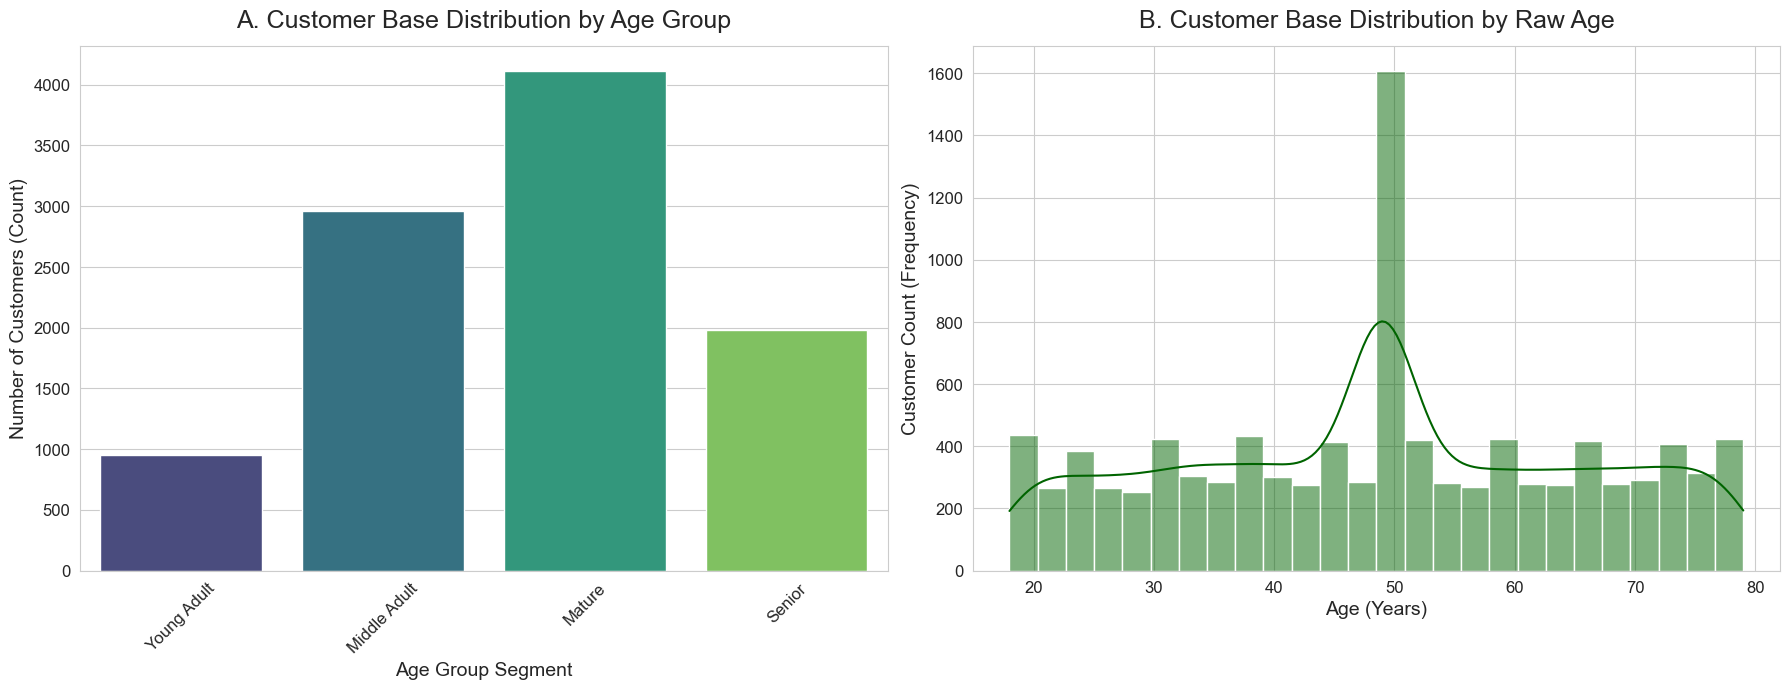

In [ ]:
# Set up the figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")

# Define the desired font size for the tick labels
TICK_FONT_SIZE = 12
LABEL_FONT_SIZE = 14

# --- Left Plot (A): Customer Base by Age Group (Categorical Counts) ---
age_group_counts = df_analytical['AgeGroup'].value_counts().reset_index()
age_group_counts.columns = ['AgeGroup', 'Count']


sns.barplot(
    x='AgeGroup', y='Count', data=age_group_counts,
    hue='AgeGroup', palette='viridis', ax=axes[0], legend=False
)
axes[0].set_title('A. Customer Base Distribution by Age Group', fontsize=18,y=1.02)
axes[0].set_xlabel('Age Group Segment', fontsize=LABEL_FONT_SIZE)
axes[0].set_ylabel('Number of Customers (Count)', fontsize=LABEL_FONT_SIZE)
axes[0].tick_params(axis='x', rotation=45, labelsize=TICK_FONT_SIZE)
# Set Y-axis tick size
axes[0].tick_params(axis='y', labelsize=TICK_FONT_SIZE)


# --- Right Plot (B): Customer Base by Raw Age (Distribution) ---
sns.histplot(df_analytical['Age'], kde=True, color='darkgreen', ax=axes[1])
axes[1].set_title('B. Customer Base Distribution by Raw Age', fontsize=18,y=1.02)
axes[1].set_xlabel('Age (Years)', fontsize=LABEL_FONT_SIZE)
axes[1].set_ylabel('Customer Count (Frequency)', fontsize=LABEL_FONT_SIZE)
# Set X and Y-axis tick size
axes[1].tick_params(axis='both', labelsize=TICK_FONT_SIZE)


plt.tight_layout()
plt.show()

The largest segment of the customer base falls within the Mature (46-65) age group, with a high concentration of customers around age 50.

### 4.1.2 Region and Education Distribution Profile
We analyse the Region column to understand the typical region of the customer.


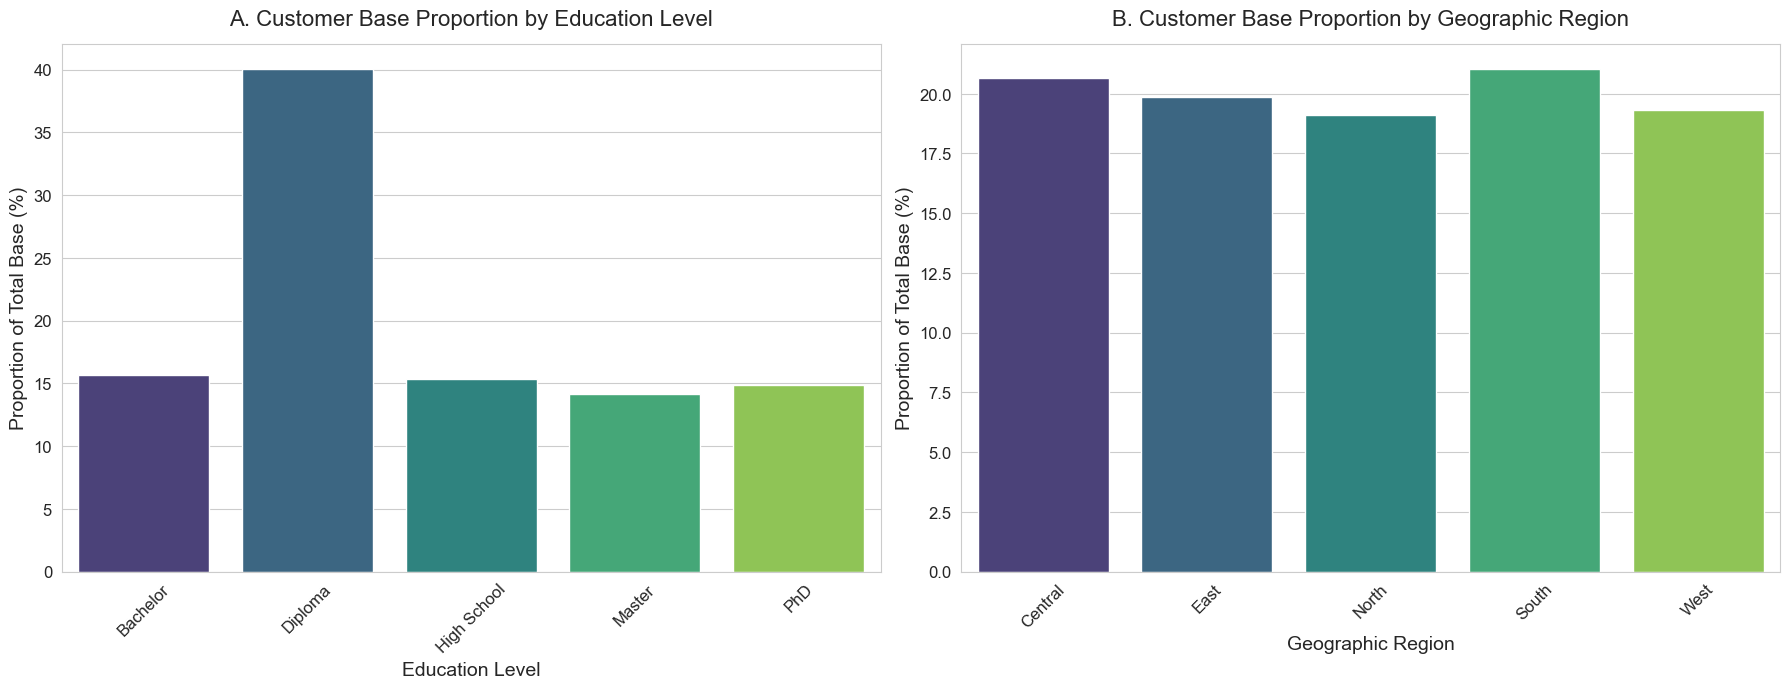


### Education Distribution Summary
  Education  Proportion (%)
    Diploma       40.017995
   Bachelor       15.635309
High School       15.345396
        PhD       14.825552
     Master       14.175747

### Geographic Distribution Summary
 Region  Proportion (%)
  South       21.023693
Central       20.643807
   East       19.884035
   West       19.334200
  North       19.114266


In [ ]:
# Calculate proportions for Education
edu_proportions = df_analytical['Education'].value_counts(normalize=True).mul(100).reset_index()
edu_proportions.columns = ['Education', 'Proportion (%)']
edu_df_sorted = edu_proportions.sort_values(by='Proportion (%)', ascending=False)

# Calculate proportions for Region
region_proportions = df_analytical['Region'].value_counts(normalize=True).mul(100).reset_index()
region_proportions.columns = ['Region', 'Proportion (%)']
region_df_sorted = region_proportions.sort_values(by='Proportion (%)', ascending=False)

# Define the desired font size for the tick labels
TICK_FONT_SIZE = 12
LABEL_FONT_SIZE = 14

# Visualization (2 Subplots)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")


# Left Plot:  Education Distribution
sns.barplot(
    x='Education', y='Proportion (%)', data=edu_df_sorted,
    hue='Education', palette='viridis', ax=axes[0], legend=False
)
axes[0].set_title('A. Customer Base Proportion by Education Level', fontsize=16, y=1.02)
axes[0].set_xlabel('Education Level', fontsize=LABEL_FONT_SIZE)
axes[0].set_ylabel('Proportion of Total Base (%)', fontsize=LABEL_FONT_SIZE)
axes[0].tick_params(axis='x', rotation=45, labelsize=TICK_FONT_SIZE)
axes[0].tick_params(axis='y', labelsize=TICK_FONT_SIZE)


# --- Right Plot (B): Region Distribution ---
sns.barplot(
    x='Region', y='Proportion (%)', data=region_df_sorted,
    hue='Region', palette='viridis', ax=axes[1], legend=False
)
# ADDED y=1.02 to create space
axes[1].set_title('B. Customer Base Proportion by Geographic Region', fontsize=16, y=1.02)
axes[1].set_xlabel('Geographic Region', fontsize=LABEL_FONT_SIZE)
axes[1].set_ylabel('Proportion of Total Base (%)', fontsize=LABEL_FONT_SIZE)
axes[1].tick_params(axis='x', rotation=45, labelsize=TICK_FONT_SIZE)
axes[1].tick_params(axis='y', labelsize=TICK_FONT_SIZE)


plt.tight_layout()
plt.show()


# --- 3. Descriptive Statistics Summary ---
print("\n### Education Distribution Summary")
print(edu_df_sorted.to_string(index=False))

print("\n### Geographic Distribution Summary")
print(region_df_sorted.to_string(index=False))

**Insights :**
1. All the regions have similar customer share
2. Most of the customers (40.017 %) have Diploma has their highest education level.

### 4.1.3 Customer Profile Segmentation

We analyse the ContractLength, CustomerSegment, PlanType and IncomeTier columns to understand the typical profile of the customer.


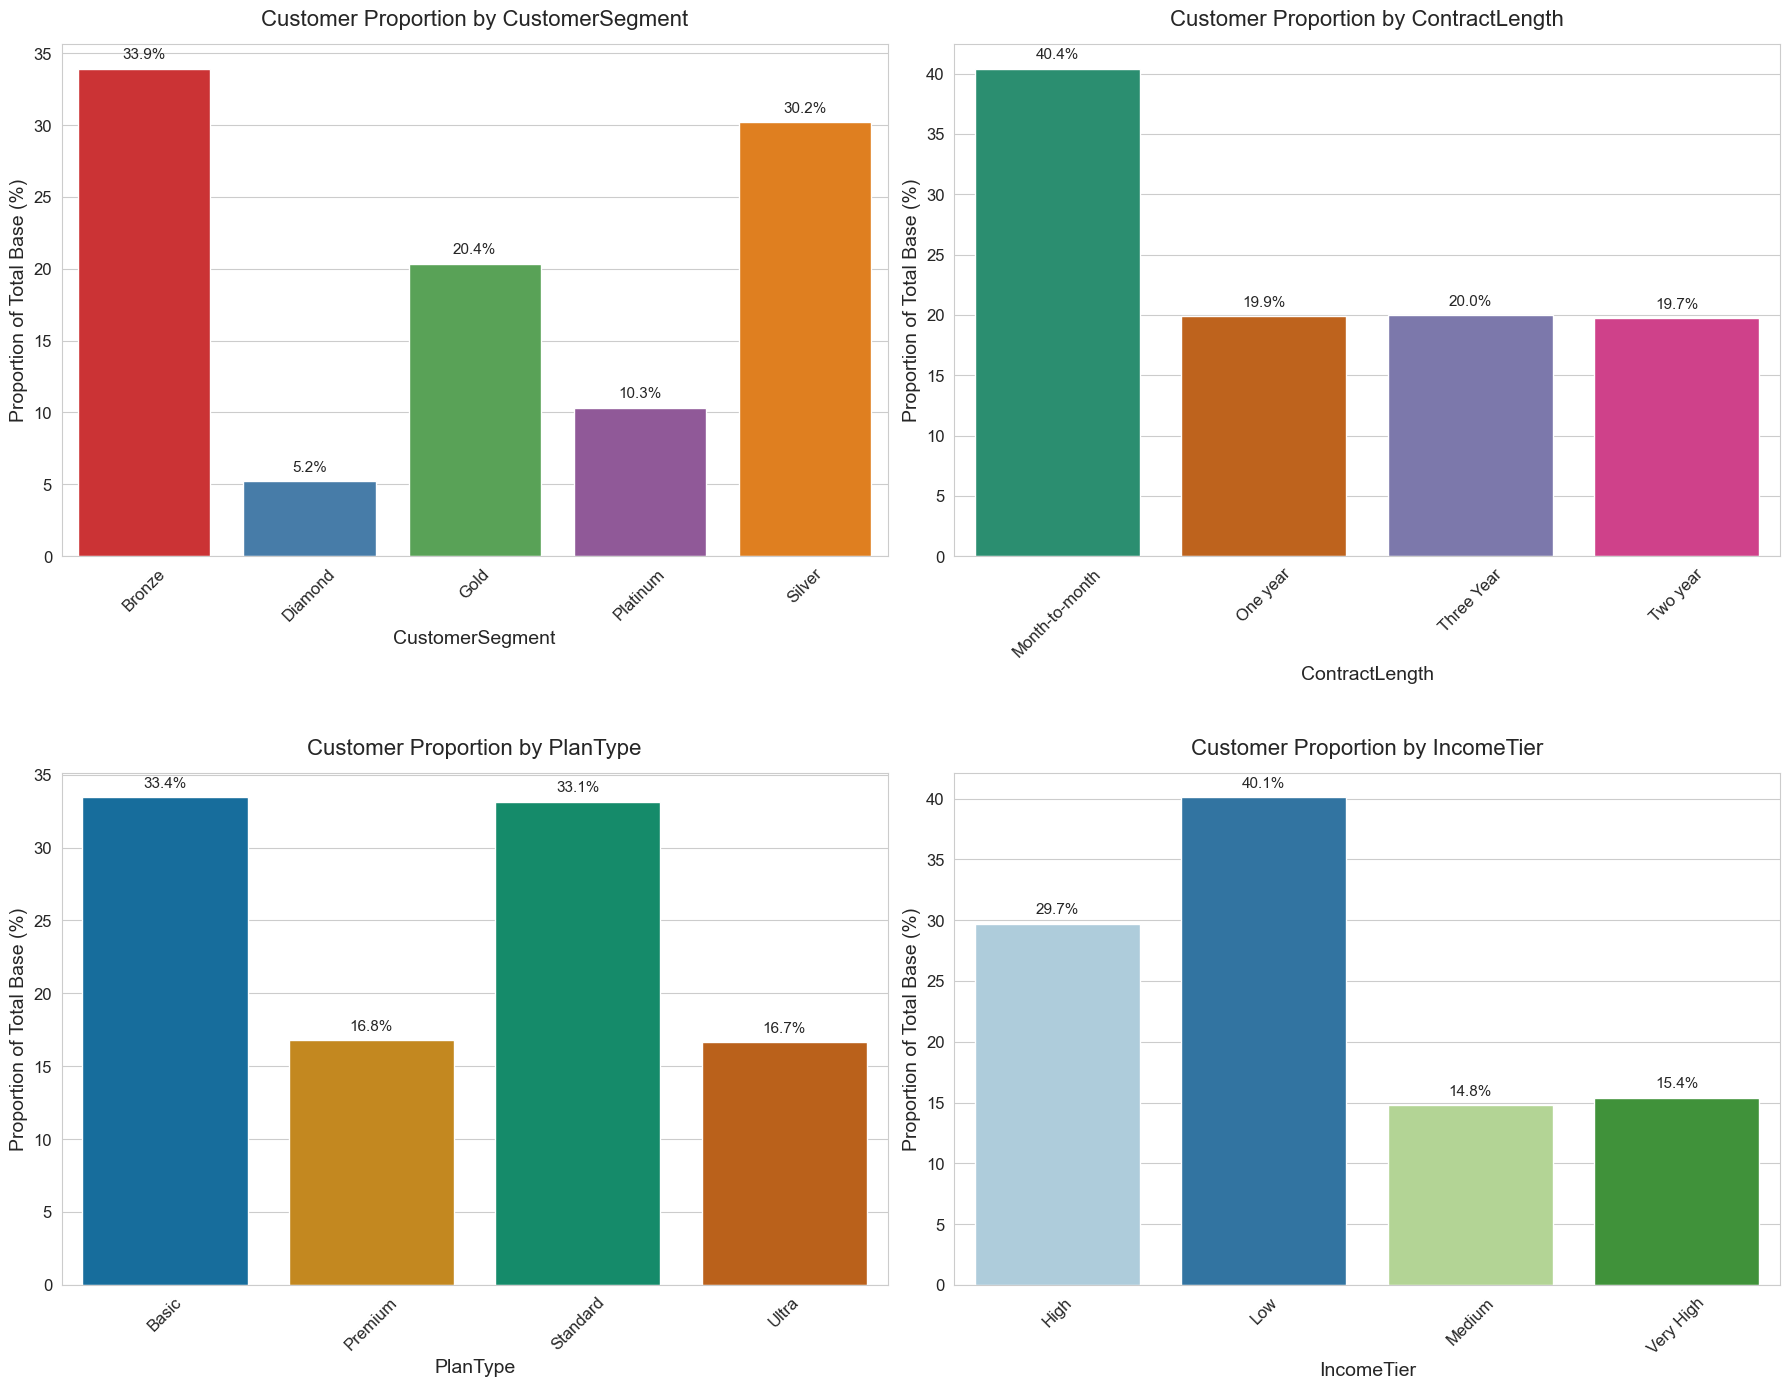


### Customer Base Composition Summary (Proportions)

--- CustomerSegment Proportions ---
CustomerSegment
Bronze      33.93
Silver      30.19
Gold        20.35
Platinum    10.33
Diamond      5.20

--- ContractLength Proportions ---
ContractLength
Month-to-month    40.42
Three Year        19.97
One year          19.87
Two year          19.73

--- PlanType Proportions ---
PlanType
Basic       33.45
Standard    33.13
Premium     16.76
Ultra       16.66

--- IncomeTier Proportions ---
IncomeTier
Low          40.12
High         29.71
Very High    15.39
Medium       14.79


In [ ]:
# Define font sizes for consistency
TICK_FONT_SIZE = 12
LABEL_FONT_SIZE = 14
TITLE_FONT_SIZE = 16

# List of categorical columns to visualize
categorical_features = ['CustomerSegment', 'ContractLength', 'PlanType', 'IncomeTier']

# --- 1. Visualization Setup ---
# Create a figure with 2 rows and 2 columns for the four plots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
sns.set_style("whitegrid")
axes = axes.flatten() # Flatten the 2x2 array of axes for easy indexing

# --- 2. Loop through features and create bar plots ---
for i, feature in enumerate(categorical_features):
    # Calculate proportions
    data = df_analytical[feature].value_counts(normalize=True).mul(100).reset_index()
    data.columns = [feature, 'Proportion (%)']

    # Sort the data by proportion for better visualization
    data_sorted = data.sort_values(by='Proportion (%)', ascending=False)

    # Select a distinct palette for each plot
    palette = ['Set1', 'Dark2', 'colorblind', 'Paired'][i % 4]

    # Create the bar plot
    sns.barplot(
        x=feature,
        y='Proportion (%)',
        data=data_sorted,
        hue=feature,
        palette=palette,
        ax=axes[i],
        legend=False
    )

    # Set titles and labels with spacing and correct font sizes
    axes[i].set_title(f'Customer Proportion by {feature}', fontsize=TITLE_FONT_SIZE, y=1.02)
    axes[i].set_xlabel(feature, fontsize=LABEL_FONT_SIZE)
    axes[i].set_ylabel('Proportion of Total Base (%)', fontsize=LABEL_FONT_SIZE)

    # Rotate x-axis labels for readability, especially for long names
    axes[i].tick_params(axis='x', rotation=45, labelsize=TICK_FONT_SIZE)
    axes[i].tick_params(axis='y', labelsize=TICK_FONT_SIZE)

    # Annotate bars with their percentage value
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{height:.1f}%',
                         (p.get_x() + p.get_width() / 2., height),
                         ha = 'center',
                         va = 'bottom',
                         fontsize = TICK_FONT_SIZE - 1,
                         xytext = (0, 5),
                         textcoords = 'offset points')

plt.tight_layout(h_pad=4.0)
plt.show()

# --- 3. Descriptive Statistics Summary Table ---
print("\n### Customer Base Composition Summary (Proportions)")
for feature in categorical_features:
    print(f"\n--- {feature} Proportions ---")
    print(df_analytical[feature].value_counts(normalize=True).mul(100).round(2).to_string())

**Insights**:
1. CustomerSegment: The base is heavily concentrated in the lower-to-mid tiers, with nearly 64% of customers classified as Bronze (33.93%) or Silver (30.19%). High-value segments (Platinum/Diamond) represent only about 15.5%.

2. ContractLength: The primary source of structural risk is the high proportion of customers on Month-to-month (40.42%) contracts, indicating a short-term, low-loyalty relationship with the company.

3. PlanType: Similar to segmentation, the customer base prefers the entry-level options, with two-thirds of customers on Basic (33.45%) or Standard (33.13%) plans.

4. IncomeTier: The largest segment is the Low Income (40.12%) tier, underscoring that the base is highly sensitive to pricing changes and may be easily poached by competitors offering better rates.

### 4.1.4 Revenue metrics

This section focuses on establishing the baseline value and profitability of the customer base.


We will calculate:
1. Average AnnualRevenue per customer : Gives the expected run rate per customer, which is vital for forecasting and determining the value of new acquisition.

2. Average TotalLifeTimeRevenue per customer: The most strategic metric, indicating the total expected financial contribution of an average customer before churn. It sets the ceiling for how much we should spend on retention efforts.
3. Average AnnualRvenue region wise: Allows us to identify your most valuable geographical markets.

In [ ]:


# 1. Overall Average Revenue Metrics
avg_annual_revenue = df_analytical['AnnualRevenue'].mean()
avg_total_lifetime_revenue = df_analytical['TotalLifetimeRevenue'].mean()

# Calculate average monthly revenue (estimated from annual)
avg_monthly_revenue = df_analytical['MonthlyRevenue'].mean()


# 2. Average Annual Revenue per Customer Region Wise
# Group by 'Region' and calculate the mean of 'AnnualRevenue'
regional_avg_annual_revenue = df_analytical.groupby('Region')['AnnualRevenue'].mean().sort_values(ascending=False)


# Output Formatting
print("Overall Average Revenue per Customer")
print(f"1. Avg Annual Revenue per Customer:    €{avg_annual_revenue:,.2f}")
print(f"2. Avg Monthly Revenue per Customer:   €{avg_monthly_revenue:,.2f} ")
print(f"3. Avg Total Lifetime Revenue per Customer: €{avg_total_lifetime_revenue:,.2f}")

print("\nAverage Annual Revenue per Customer by Region")
print(regional_avg_annual_revenue.to_string(float_format='€{:,.2f}'.format))

Overall Average Revenue per Customer
1. Avg Annual Revenue per Customer:    €1,261.03
2. Avg Monthly Revenue per Customer:   €105.09 
3. Avg Total Lifetime Revenue per Customer: €6,299.71

Average Annual Revenue per Customer by Region
Region
East      €1,282.80
Central   €1,262.64
West      €1,261.13
South     €1,250.22
North     €1,248.41


/var/folders/ll/g56h5zkx6q3g3qh4w_qhb19r0000gn/T/ipykernel_1739/1754782045.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_avg_annual_revenue = df_analytical.groupby('Region')['AnnualRevenue'].mean().sort_values(ascending=False)


## 4.2 Foundational Churn Analysis: Baseline and Recency
Let us calculate the overall churn rate and analyse the impact of Customer Activity Status (CustomerStatus) on the churn rate.

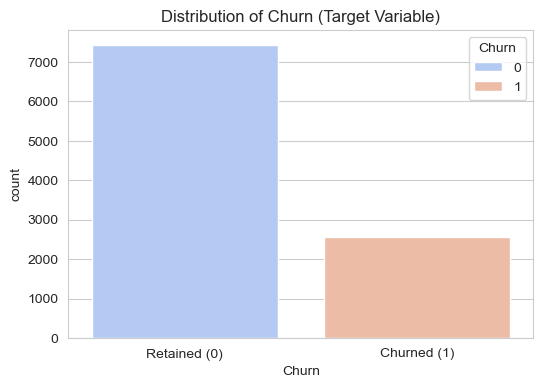

The overall churn rate is : 25.71 %


In [ ]:
# Calculate the overall churn rate
churn_rate=(df_analytical[df_analytical['Churn']==1].shape[0]/((df_analytical[df_analytical['Churn']==0].shape[0]) + (df_analytical[df_analytical['Churn']==1].shape[0])))*100
# Plotting Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df_analytical, hue='Churn', palette='coolwarm')
plt.title('Distribution of Churn (Target Variable)')
plt.xticks([0, 1], ['Retained (0)', 'Churned (1)'])
plt.show()
print(f'The overall churn rate is : {churn_rate:0.2f} %')



Churn Rate by Customer Activity Status:
                Churn_Rate  Total_Customers
CustomerStatus                             
Inactive          0.711773             3355
At Risk           0.062864             1718
Active            0.011061             4882


/var/folders/ll/g56h5zkx6q3g3qh4w_qhb19r0000gn/T/ipykernel_1739/1369596401.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_status = df_analytical.groupby('CustomerStatus')['Churn'].agg(


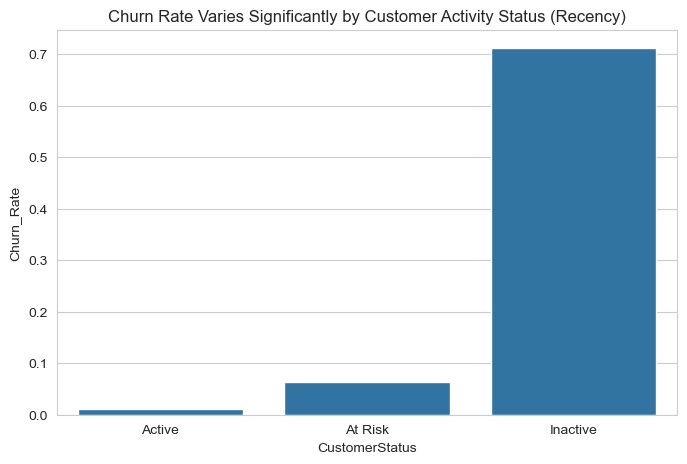

In [ ]:
# Churn Rate by Customer Status
churn_by_status = df_analytical.groupby('CustomerStatus')['Churn'].agg(
    Churn_Rate='mean',
    Total_Customers='count'
).sort_values(by='Churn_Rate', ascending=False)
print("\nChurn Rate by Customer Activity Status:")
print(churn_by_status)

# Visualization: Churn Rate by Customer Status
plt.figure(figsize=(8, 5))
sns.barplot(x='CustomerStatus', y='Churn_Rate', data=churn_by_status)
plt.title('Churn Rate Varies Significantly by Customer Activity Status (Recency)')
plt.show()

**Insight**: The Inactive segment has the highest churn rate (~71%), confirming that the recency of the last login ($\mathbf{DaysSinceLastLogin}$) is the most critical and immediate behavioral signal.

**Action Recommendation**: Implement a zero-latency alert system to flag customers moving into the $\mathbf{Inactive}$ and $\mathbf{At Risk}$ status. All retention resources must be concentrated here.


## 4.3 Detailed Churn Analysis

### 4.3.1 Structural and Financial Drivers

In this section, we will move beyond immediate recency to investigate the impact of various structural, Financial and Behavioral drivers on the churn.


We start by analyzing features that define the customer's commitment level and financial reliability. These are often the strongest non-behavioral predictors of churn.

1. Churn Rate by ContractLength

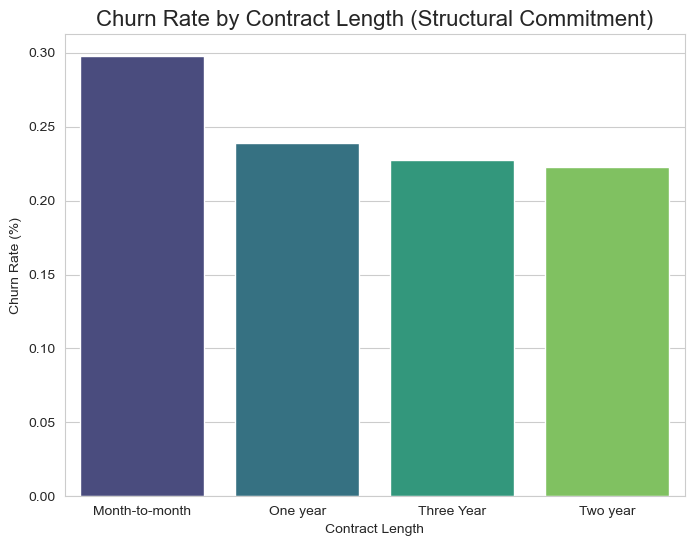

Churn Rate by ContractLength is    ContractLength     Churn
0  Month-to-month  0.297551
1        One year  0.238934
2      Three Year  0.227728
3        Two year  0.222391


In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)

# Calculate Churn Rate
contract_churn = df_analytical.groupby('ContractLength', observed=True)['Churn'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x='ContractLength',
    y='Churn',
    data=contract_churn,
    hue='ContractLength', # Explicitly map hue to the x variable
    palette='viridis',
    legend=False          # Suppress the redundant legend
)
plt.title('Churn Rate by Contract Length (Structural Commitment)', fontsize=16)
plt.ylabel('Churn Rate (%)')
plt.xlabel('Contract Length')
plt.show()


print(f'Churn Rate by ContractLength is {contract_churn}')

**Insights** : Month-to-month contracts have the highest churn rate at 29.76%. This confirms that the lack of any long-term commitment is a strong indicator of churn. These customers can leave with the lowest friction.

The difference in churn rate between a one-year contract and the longest three-year contract is minimal (less than $1.7$ percentage points). This suggests that the major retention benefit comes from simply securing the first annual commitment.

**Action Recommendation**:
1. Allocate retention budget specifically to incentivize the Month-to-month segment to upgrade to the One Year contract
2.  Make the One Year contract the default or most heavily discounted option during signup.

2. Churn Rate by PaymentDelinquencyStatus

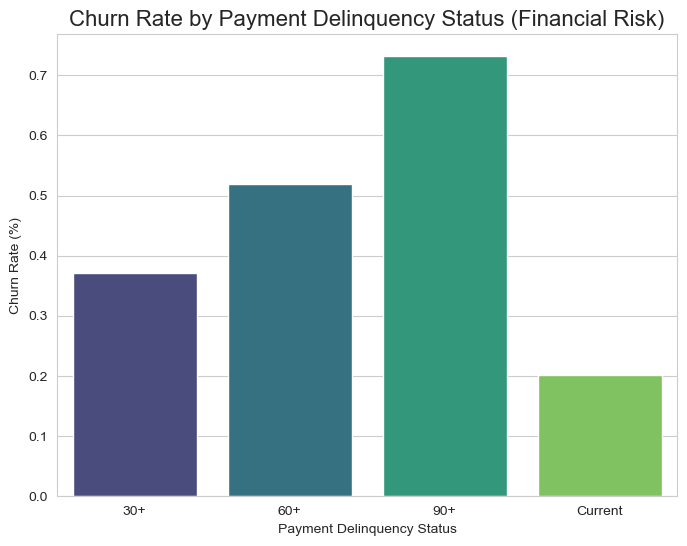

Churn Rate by PaymentDelinquencyStatus is: 
 
   PaymentDelinquencyStatus     Churn
0                      30+  0.370637
1                      60+  0.519056
2                      90+  0.731527
3                  Current  0.201685


In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)

# Calculate Churn Rate (Fix 1: Add observed=True to silence Pandas warning)
delinquency_churn = df_analytical.groupby('PaymentDelinquencyStatus', observed=True)['Churn'].mean().reset_index()

# Plot (Fix 2: Add hue=x_variable and legend=False to silence Seaborn warning)
plt.figure(figsize=(8, 6))
sns.barplot(
    x='PaymentDelinquencyStatus',
    y='Churn',
    data=delinquency_churn,
    hue='PaymentDelinquencyStatus', # Explicitly map hue
    palette='viridis',
    legend=False                   # Suppress redundant legend
)
plt.title('Churn Rate by Payment Delinquency Status (Financial Risk)', fontsize=16)
plt.ylabel('Churn Rate (%)')
plt.xlabel('Payment Delinquency Status')
plt.show()

print(f'Churn Rate by PaymentDelinquencyStatus is: \n \n {delinquency_churn}')

**Insights**:
- Imminent Loss at 90+ Days: Customers who delay payment by 90+ days have an extremely high churn rate of 73.15%.
- Linear Risk Progression: The risk increases linearly with the delay:
    - Current: 20.17% (This is the baseline risk in our overall dataset).
    - 30+ Days: Risk increases by +16.89 percentage points (37.06%$).
    - 60+ Days: Risk crosses the 50% threshold (51.91 %).

- Critical Intervention Window: The period between Current status ($20.17\%$) and 30+ Days ($37.06\%$) is the most critical intervention window. Successful intervention here prevents the customer from escalating to the $50\%$ and $73\%$ risk tiers.

**Action Recommendation**:
Deploy proactive, non-collection outreach immediately upon a missed payment.



3. Churn rate by AutoPay

/var/folders/ll/g56h5zkx6q3g3qh4w_qhb19r0000gn/T/ipykernel_1739/814505238.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  autopay_churn = df_analytical.groupby('AutoPay')['Churn'].mean().reset_index()


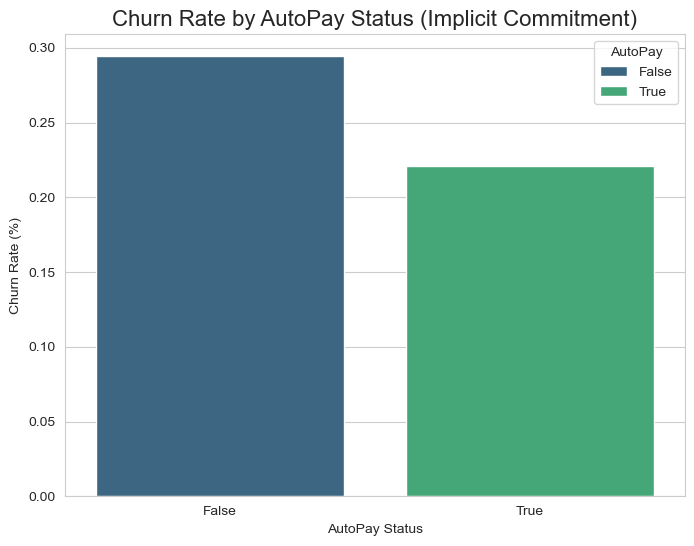

Churn Rate by Autopay option is: 
 
   AutoPay     Churn
0   False  0.294356
1    True  0.220751


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)

# Calculate Churn Rate
autopay_churn = df_analytical.groupby('AutoPay')['Churn'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='AutoPay', y='Churn', data=autopay_churn, hue='AutoPay', palette='viridis')
plt.title('Churn Rate by AutoPay Status (Implicit Commitment)', fontsize=16)
plt.ylabel('Churn Rate (%)')
plt.xlabel('AutoPay Status')
plt.show()

print(f'Churn Rate by Autopay option is: \n \n {autopay_churn}')

**Insights**: Customers not enrolled in AutoPay have a churn rate of 29.43 % which is substantially higher than those enrolled in AutoPay (22.07% )

**Action Recommendation**: The Organization should agressively push AutoPay enrollment for the entire customer base.

4. Summary of Churn Rate by Plan Type

In [ ]:
# Calculate Churn Rate
plan_type_churn = df_analytical.groupby('PlanType')['Churn'].mean().sort_values(ascending=False).reset_index()
plan_type_churn

/var/folders/ll/g56h5zkx6q3g3qh4w_qhb19r0000gn/T/ipykernel_1739/4093035967.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plan_type_churn = df_analytical.groupby('PlanType')['Churn'].mean().sort_values(ascending=False).reset_index()


,PlanType,Churn
0,Ultra,0.265306
1,Basic,0.258219
2,Standard,0.255281
3,Premium,0.250447


**Insight**: There isnt much variation in the churn rate based on the PlanType. This feature is not a strong predictor of churn risk.


5. Summary of Churn Rate by IncomeTier

In [ ]:
# Calculate Churn Rate
income_tier_churn = df_analytical.groupby('IncomeTier')['Churn'].mean().sort_values(ascending=False).reset_index()
income_tier_churn

/var/folders/ll/g56h5zkx6q3g3qh4w_qhb19r0000gn/T/ipykernel_1739/999664423.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_tier_churn = df_analytical.groupby('IncomeTier')['Churn'].mean().sort_values(ascending=False).reset_index()


,IncomeTier,Churn
0,Low,0.259905
1,High,0.259085
2,Medium,0.256254
3,Very High,0.246914


**Insight**: There isnt much variation in the churn rate based on the IncomeTier. This feature is not a strong predictor of churn risk.


### 4.3.2 Engagement Drivers

In this section, we will investigate the impact of UsageChangePct on Churn


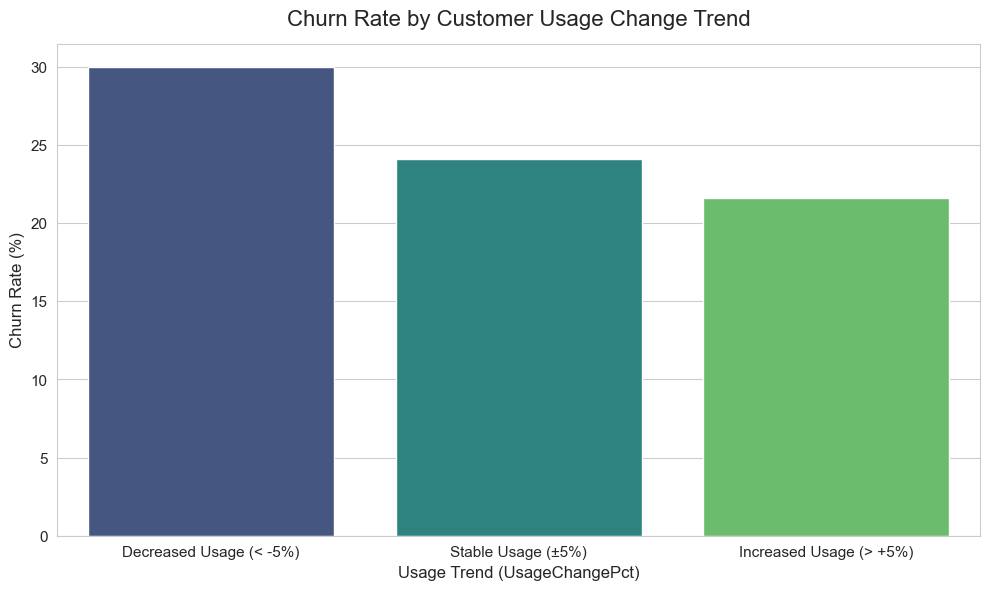


### Churn Rate by Usage Trend Summary
            Usage Trend  Churn Rate (%)
Decreased Usage (< -5%)       29.989440
     Stable Usage (±5%)       24.096386
Increased Usage (> +5%)       21.635220


In [ ]:
# Define font sizes for consistency
TICK_FONT_SIZE = 11
LABEL_FONT_SIZE = 12
TITLE_FONT_SIZE = 16

# --- Data Preparation ---

# 1. Churn Rate by UsageChangePct (Trend)
# Bin the UsageChangePct into meaningful categories:
# Decreased (below -5%), Stable (±5%), and Increased (above +5%).
usage_bins = pd.cut(
    df_analytical['UsageChangePct'],
    bins=[-float('inf'), -0.05, 0.05, float('inf')],
    labels=['Decreased Usage (< -5%)', 'Stable Usage (±5%)', 'Increased Usage (> +5%)']
)

# Calculate the churn rate (%) for each bin
usage_churn_df = df_analytical.groupby(usage_bins, observed=True)['Churn'].mean().mul(100).reset_index()
usage_churn_df.columns = ['Usage Trend', 'Churn Rate (%)']


# --- Visualization Setup (Single Plot) ---
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the bar plot
sns.barplot(
    x='Usage Trend',
    y='Churn Rate (%)',
    data=usage_churn_df,
    hue='Usage Trend',
    palette='viridis',
    legend=False
)

# Set titles and labels
plt.title('Churn Rate by Customer Usage Change Trend', fontsize=TITLE_FONT_SIZE, y=1.02)
plt.xlabel('Usage Trend (UsageChangePct)', fontsize=LABEL_FONT_SIZE)
plt.ylabel('Churn Rate (%)', fontsize=LABEL_FONT_SIZE)
plt.tick_params(axis='x', rotation=0, labelsize=TICK_FONT_SIZE)
plt.tick_params(axis='y', labelsize=TICK_FONT_SIZE)


plt.tight_layout()
plt.show()

# --- Print Summary Table ---
print("\n### Churn Rate by Usage Trend Summary")
print(usage_churn_df.to_string(index=False))

**Insight**
The key insight is that a drop in usage is a highly effective leading indicator of customer defection. Customers with Decreased Usage (< -5%) have a churn rate of $\mathbf{29.99\%}$, which is significantly higher than the $\mathbf{21.64\%}$ rate for increasing-usage customers.

**Recommended Action**
Automatically flag any customer whose $\mathbf{UsageChangePct}$ drops below the $\mathbf{-5\%}$ threshold and mmediately launch a personalized, diagnostic outreach campaign

### 4.3.3 Service Experience

This section investigates the impact of service quality and customer frustation on churn

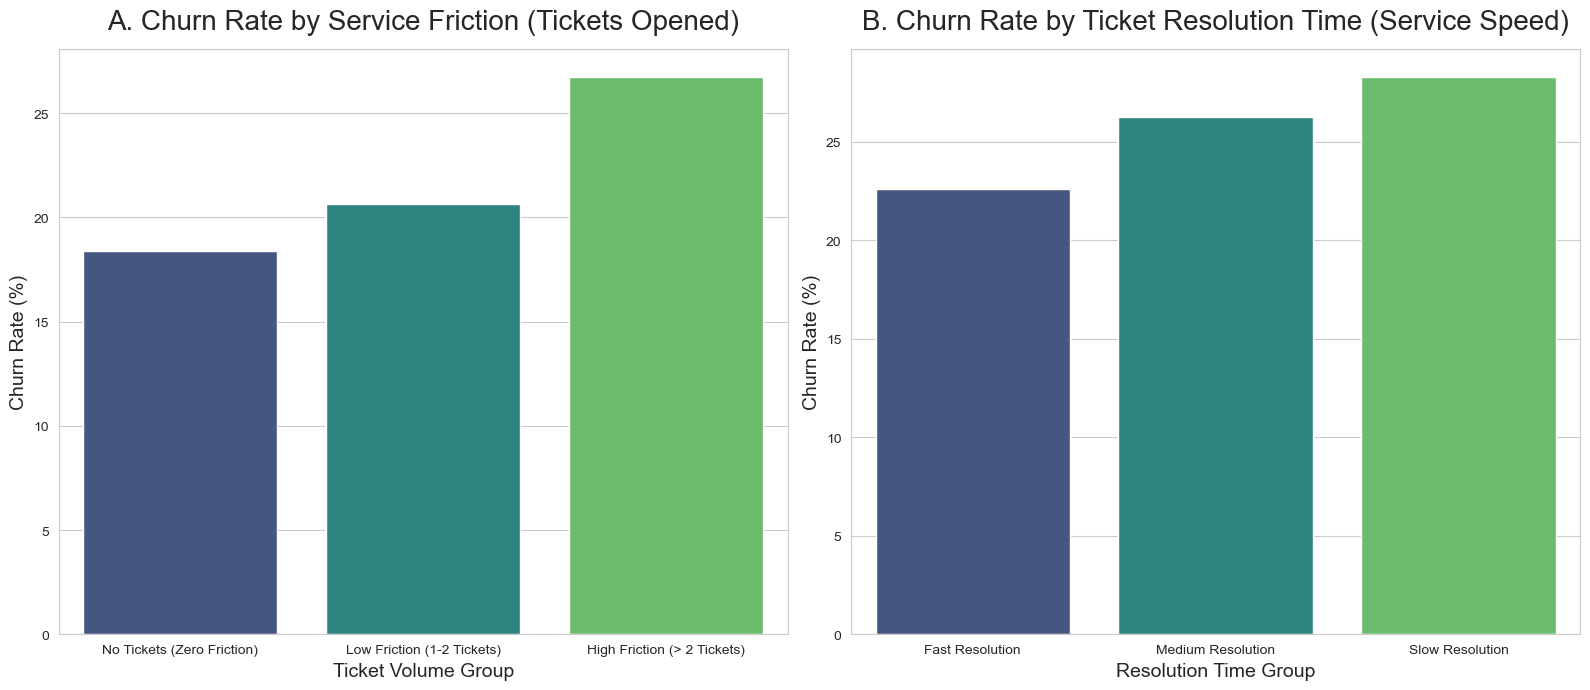


### Service Experience Churn Rate Summary

--- Churn Rate by Tickets Opened ---
              Ticket Volume  Churn Rate (%)
 No Tickets (Zero Friction)       18.400000
 Low Friction (1-2 Tickets)       20.630081
High Friction (> 2 Tickets)       26.728489

--- Churn Rate by Ticket Resolution Time ---
  Resolution Time  Churn Rate (%)
  Fast Resolution       22.608696
Medium Resolution       26.244751
  Slow Resolution       28.284343


In [ ]:
TICK_FONT_SIZE = 14
LABEL_FONT_SIZE = 14
TITLE_FONT_SIZE = 20

# --- Data Preparation ---

# 1. Churn Rate by Tickets Opened (Volume of Friction)
# Bin tickets into None, Low, and High friction groups
tickets_bins = pd.cut(
    df_analytical['TicketsOpened'],
    bins=[-1, 0.5, 2, float('inf')], # Example: 0 tickets, 1-2 tickets, > 2 tickets
    labels=['No Tickets (Zero Friction)', 'Low Friction (1-2 Tickets)', 'High Friction (> 2 Tickets)'],
    duplicates='drop'
)
tickets_churn_df = df_analytical.groupby(tickets_bins, observed=True)['Churn'].mean().mul(100).reset_index()
tickets_churn_df.columns = ['Ticket Volume', 'Churn Rate (%)']


# 2. Churn Rate by Tickets Resolution Time (Speed of Service)
# Bin resolution time using quantiles to identify Fast, Medium, and Slow groups
resolution_bins = pd.qcut(
    df_analytical['TicketsResolutionTime'],
    q=3,
    labels=['Fast Resolution', 'Medium Resolution', 'Slow Resolution'],
    duplicates='drop'
)
resolution_churn_df = df_analytical.groupby(resolution_bins, observed=True)['Churn'].mean().mul(100).reset_index()
resolution_churn_df.columns = ['Resolution Time', 'Churn Rate (%)']


# --- Visualization Setup ---
fig, axes = plt.subplots(1, 2, figsize=(16,7))
sns.set_style("whitegrid")


# --- Plot A: Churn Rate by Tickets Opened ---
sns.barplot(x='Ticket Volume', y='Churn Rate (%)', data=tickets_churn_df, hue='Ticket Volume', palette='viridis', ax=axes[0], legend=False)
axes[0].set_title('A. Churn Rate by Service Friction (Tickets Opened)', fontsize=TITLE_FONT_SIZE, y=1.02)
axes[0].set_xlabel('Ticket Volume Group', fontsize=LABEL_FONT_SIZE)
axes[0].set_ylabel('Churn Rate (%)', fontsize=LABEL_FONT_SIZE)


# --- Plot B: Churn Rate by Ticket Resolution Time ---
sns.barplot(x='Resolution Time', y='Churn Rate (%)', data=resolution_churn_df, hue='Resolution Time', palette='viridis', ax=axes[1], legend=False)
axes[1].set_title('B. Churn Rate by Ticket Resolution Time (Service Speed)', fontsize=TITLE_FONT_SIZE, y=1.02)
axes[1].set_xlabel('Resolution Time Group', fontsize=LABEL_FONT_SIZE)
axes[1].set_ylabel('Churn Rate (%)', fontsize=LABEL_FONT_SIZE)


plt.tight_layout()
plt.show()

print("\n### Service Experience Churn Rate Summary")
print("\n--- Churn Rate by Tickets Opened ---")
print(tickets_churn_df.to_string(index=False))
print("\n--- Churn Rate by Ticket Resolution Time ---")
print(resolution_churn_df.to_string(index=False))

**Insights**
1. Churn is 45% higher for the High Friction group (26.73%) compared to the Zero Friction group (18.40%).
2. Churn is highest in the Slow Resolution group (28.28%), which is 25% higher than the Fast Resolution group (22.61%). This indicates that slow service recovery is a critical failure point.

**Recommended Actions**
1. Focus investment on improving service reliability and self-service tools to reduce the absolute number of tickets being opened.
2. Accelerate Ticket resolution

## 4.4 Acquisition Seasonality Analysis

The objective is to analyze the Quarter of the $\mathbf{ContractStartDate}$ to identify the months that generate the highest and lowest volume of new customer signups. This information is vital for resource planning, staffing, and marketing budget allocation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the last two characters (e.g., 'Q4') to get the quarter only
df_analytical['SignupQuarter'] = df_analytical['SignupSeason'].str.slice(-2)

TICK_FONT_SIZE = 9
LABEL_FONT_SIZE = 12
TITLE_FONT_SIZE = 16

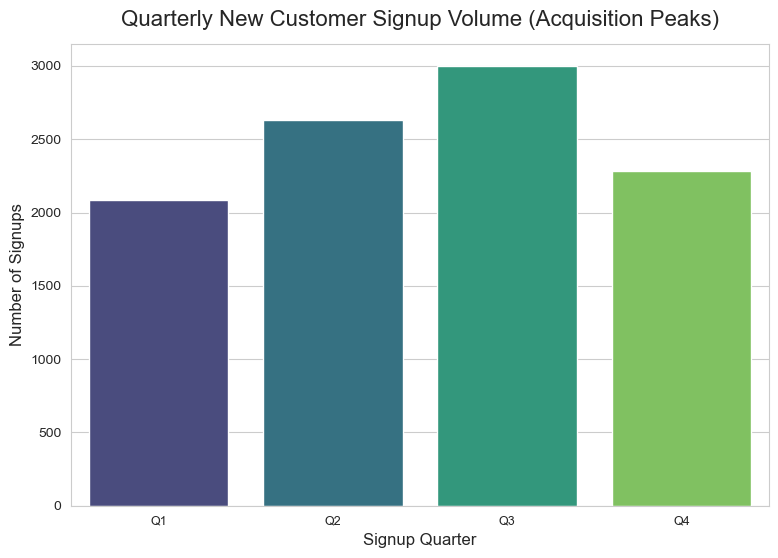


### Quarterly Signup Volume Summary
Quarter  Signups
     Q1     2087
     Q2     2634
     Q3     3002
     Q4     2280


In [ ]:
# --- Analysis ---

# Calculate the count of signups per quarter
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
quarterly_signups = df_analytical['SignupQuarter'].value_counts().reindex(quarter_order, fill_value=0).reset_index()
quarterly_signups.columns = ['Quarter', 'Signups']


# --- Visualization ---

plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
sns.barplot(
    x='Quarter',
    y='Signups',
    data=quarterly_signups,
    hue='Quarter',
    palette='viridis',
    legend=False
)

plt.title('Quarterly New Customer Signup Volume (Acquisition Peaks)', fontsize=TITLE_FONT_SIZE, y=1.02)
plt.xlabel('Signup Quarter', fontsize=LABEL_FONT_SIZE)
plt.ylabel('Number of Signups', fontsize=LABEL_FONT_SIZE)
plt.tick_params(axis='x', labelsize=TICK_FONT_SIZE)
plt.show()


print("\n### Quarterly Signup Volume Summary")
print(quarterly_signups.to_string(index=False))

Q3 generates ~44% more signups than Q1, confirming a substantial and predictable acquisition seasonality.

**Action**: Ensure full staffing and readiness for Q3 (July, August, September).

Goal: Allocate maximum resources to sales, customer support, and technical onboarding during this period. The goal is to maintain service quality when volume is highest to prevent poor early customer experiences that lead to churn (as seen in your prior analysis).


________________

# 5. References

- **McCoy, S. (2020)**. Murach’s Python for data analysis. Mike Murach & Associates.

# 6. Appendix

AI tools were used limitedly, mainly for the purpose of formatting the markdown content.
Please find the specific prompts, AI responses, critical evaluation, and explanation of adaptations below:

----

1. Prompt:
" Format this such that it is suitable for markdown in jupyter notebook. Do not alter the original content

Import Libraries: The following libraries are imported to support the data analytics lifecycle: Pandas (pd) & NumPy (np): Used for data manipulation, structural inspection, and numerical operations. Matplotlib (plt) & Seaborn (sns):Used for generating data visualisations and statistical plots.

AI response:
### **Import Libraries**
The following libraries are imported to support the data analytics lifecycle:

* **Pandas (`pd`) & NumPy (`np`):** Used for data manipulation, structural inspection, and numerical operations.
* **Matplotlib (`plt`) & Seaborn (`sns`):** Used for generating data visualisations and statistical plots.
</br>
</br>

----


2. Prompt:
How to find the version of python, numpy, pandas , matplotlib and seaborn in my current virtual environment

AI response:
import sys
import numpy
import pandas
import matplotlib
import seaborn

print("Python:", sys.version)
print("NumPy:", numpy.__version__)
print("Pandas:", pandas.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn:", seaborn.__version__)


Adaption: This code was utilized to determine the version of packages in the current environment
</br>

</br>


-----



3. Prompt:
How to create a table in markdown in jupyter notebook

AI response:
You can create tables in Markdown inside a Jupyter Notebook using the standard Markdown table syntax.

Here’s the basic structure:

```markdown
| Column 1 | Column 2 | Column 3 |
|----------|----------|----------|
| Value 1  | Value 2  | Value 3  |
| Value A  | Value B  | Value C  |
```



## ✅ **Example Table**

```markdown
| Library    | Version | Description                   |
|------------|---------|-------------------------------|
| NumPy      | 1.26.0  | Numerical computing library   |
| Pandas     | 2.1.0   | Data manipulation and analysis|
| Matplotlib | 3.8.0   | Data visualization library    |
| Seaborn    | 0.13.0  | Statistical data visualization|
```



## Tips

* Use `|` to separate columns.
* Use `---` under the header row to define the table.
* You can align text using colons:

  * `:---` = left align
  * `:---:` = center align
  * `---:` = right align

Example:

```markdown
| Left | Center | Right |
|:-----|:------:|------:|
| a    |   b    |     c |
```



If you want, I can generate a table template for your project documentation.


Adaptation: This format was utilized to create tables wherever necessary in the jupyter notebook


------


4. Prompt:
How to find all the columns that are imported as an object in the  dataframe

AI Response:

To find **all columns with data type `object`** in a Pandas DataFrame, you can use either of these approaches:



## ✅ **Method 1: Using `select_dtypes` (Recommended)**

```python
object_columns = df.select_dtypes(include='object').columns
print(object_columns)
```

This returns all column names that are stored as `object` type.



## ✅ **Method 2: Using `dtypes` + filtering**

```python
object_columns = df.dtypes[df.dtypes == 'object'].index
print(object_columns)
```



## ✅ **Method 3: Show the columns + count**

```python
df.select_dtypes(include='object').info()
```

This shows:

* Column names
* Non-null counts
* Number of object columns



## ⚡ Optional: Convert them to a list

```python
object_cols_list = list(df.select_dtypes(include='object').columns)
object_cols_list
```



If you'd like, tell me your DataFrame name and I can generate ready-to-paste code for your notebook.


Evaluation:
.select_dtypes() method was utilized to find the columns which are imported as objects in the dataframe


-----

5. Prompt:
What is the function to convert an object column to category data type

Response:
To convert an **object** column to a **category** data type in Pandas, you use:

## ✅ **`.astype('category')`**

### **Example**

```python
df['column_name'] = df['column_name'].astype('category')
```



## Convert multiple object columns to category

```python
obj_cols = df.select_dtypes(include='object').columns
df[obj_cols] = df[obj_cols].astype('category')
```



## Check the result

```python
df.dtypes
```



If you'd like, I can generate a clean Markdown + code section for your notebook as well.


Evaluation:
.astype() function was utilized to convert the object columns to category data type


----


6. Prompt:
I have column which has € and $ symbols. I want to remove them before converting the column to numeric type give me the code

response:
Here is the clean and correct code to **remove `€` and `$` symbols** from a column and convert it to **numeric**:

### ✅ **Option 1 — Replace symbols using `str.replace`**

```python
df['column_name'] = df['column_name'].str.replace('€', '', regex=False)
df['column_name'] = df['column_name'].str.replace('$', '', regex=False)

df['column_name'] = pd.to_numeric(df['column_name'])
```



### ✅ **Option 2 — Remove ALL non-numeric characters at once (recommended)**

```python
df['column_name'] = df['column_name'].str.replace(r'[^0-9.\-]', '', regex=True)
df['column_name'] = pd.to_numeric(df['column_name'])
```

This removes:

* €
* $
* commas
* spaces
* any unwanted characters



### 📌 Example

If your column is called `MonthlyCost`:

```python
df['MonthlyCost'] = df['MonthlyCost'].str.replace(r'[^0-9.\-]', '', regex=True)
df['MonthlyCost'] = pd.to_numeric(df['MonthlyCost'])
```



If you want, I can also help you check which rows still fail to convert.


-----

7. Prompt: But i dont want "." to be removed as it represents the decimal point

Response:

Exactly! You **don’t want to remove the decimal point**, so you need to keep `.` while removing other non-numeric characters. The second approach I shared already handles this correctly with a regex. Here’s the safe version:

```python
# Remove everything except digits, decimal point, and minus sign
df['column_name'] = df['column_name'].str.replace(r'[^0-9.\-]', '', regex=True)

# Convert to numeric
df['column_name'] = pd.to_numeric(df['column_name'])
```

✅ This will:

* Remove `€`, `$`, spaces, commas, or any other unwanted characters
* Keep `.` (decimal) and `-` (negative numbers) intact
* Convert the column to numeric type



If you want, I can write a **one-liner** that handles this for **multiple currency columns** in your DataFrame. Do you want me to do that?

Adaptation: The suggested code was utilized to strip all numeric characters from monthlyvalue columns in both customer_info and customer_behavior table before converting them to numeric datatype

----


8. Prompt:
What is the formula for finding the outliers using iqr


Response:
The **Interquartile Range (IQR) method** is a standard way to detect outliers in a dataset. Here’s the formula and explanation:



## **Step 1: Calculate IQR**

[
\text{IQR} = Q3 - Q1
]

Where:

* (Q1) = 25th percentile (first quartile)
* (Q3) = 75th percentile (third quartile)


## **Step 2: Define outlier boundaries**

[
\text{Lower Bound} = Q1 - 1.5 \times \text{IQR}
]

[
\text{Upper Bound} = Q3 + 1.5 \times \text{IQR}
]



## **Step 3: Identify outliers**

* Any data point **< Lower Bound** → Outlier
* Any data point **> Upper Bound** → Outlier



### **Optional: Extreme outliers**

Some people use **3 × IQR** instead of 1.5 × IQR for extreme outliers:

[
\text{Lower Bound} = Q1 - 3 \times \text{IQR}, \quad
\text{Upper Bound} = Q3 + 3 \times \text{IQR}
]


### **Example in Python**

```python
Q1 = df['column_name'].quantile(0.25)
Q3 = df['column_name'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['column_name'] < lower_bound) | (df['column_name'] > upper_bound)]
```

This will give you all the outlier rows in that column.


If you want, I can also write a **ready-to-use function** to detect outliers for **all numeric columns** in a DataFrame. Do you want me to do that?

Adaptation: This formula for IQR was utilized for finiding and fixing outliers in numerical columns in all the dataframes




# 7. Individual contribution statement

* **Chetan Dummegere Kumar** - [125111933]
Led the project's initial data import, validation, and cleaning phase. Successfully cleaned the Customer_info dataframe identifying and resolving data quality issues such as missing values, inconsistencies, values outside the range and outliers. Also mapping all the variations to the original categories.


* **M Hasibul Ahsan** - [125125216]
Performed detailed churn analysis, analysing the impact of structural and financial drivers, engagement driver and service experience on churn.

* **Nikith Sasikumar** - [125123481]
Led the Data Analysis phase performing descriptive statistics to investigate the profile of the customer base. Updated the table of contents and collaboratively worked to organize the notebook.

* **Royston Raj** - [125180107]
Merged the dataframes and created derived fields that are required for further downstream analysis. Performed segmentation to convert continuous variables into meaningful categories. Also perfomed Acquisition seasonality analysis.


* **Surendra Pal** - [125118292]
Successfully cleaned the customer_behavior dataframe identifying and resolving data quality issues such as missing values, inconsistencies, values outside the range and outliers. Performed foundational churn analysis to establish recency as one of the most import driver of churn.

* **Yash Chandrakant Bharati** - [125107480]
Successfully cleaned the monthly_logins dataframe identifying and resolving data quality issues such as missing values, inconsistencies, values outside the range and outliers. Converted the data from wide to long format and pivoted back to wide format after cleaning and performing features aggregation
